In [ ]:
import sys

sys.path.append("..")

In [ ]:
from agents.agent_finrl import FinRLAgent
from config import config, config_indicators
from environments.env_finrl import FinRLTradingEnv
from preprocessor.findata_preprocessor import FinancialDataPreprocessor
from visualiser.findata_visualiser import FinancialDataVisualiser
from visualiser.model_visualiser import ModelVisualiser

In [ ]:
import os

if not os.path.exists("../" + config.MODELS_DIR):
    os.makedirs("../" + config.MODELS_DIR)

if not os.path.exists("../" + config.RESULTS_DIR):
    os.makedirs("../" + config.RESULTS_DIR)

In [ ]:
# If train is False, load the model from the models directory
TRAIN = False

In [ ]:
finpreprocessor = FinancialDataPreprocessor(config.START_DATE, config.END_DATE)
train_data, trade_data = finpreprocessor.load_train_test_data(
    "../" + config.DATA_DIR, config.TEST_NAME
)

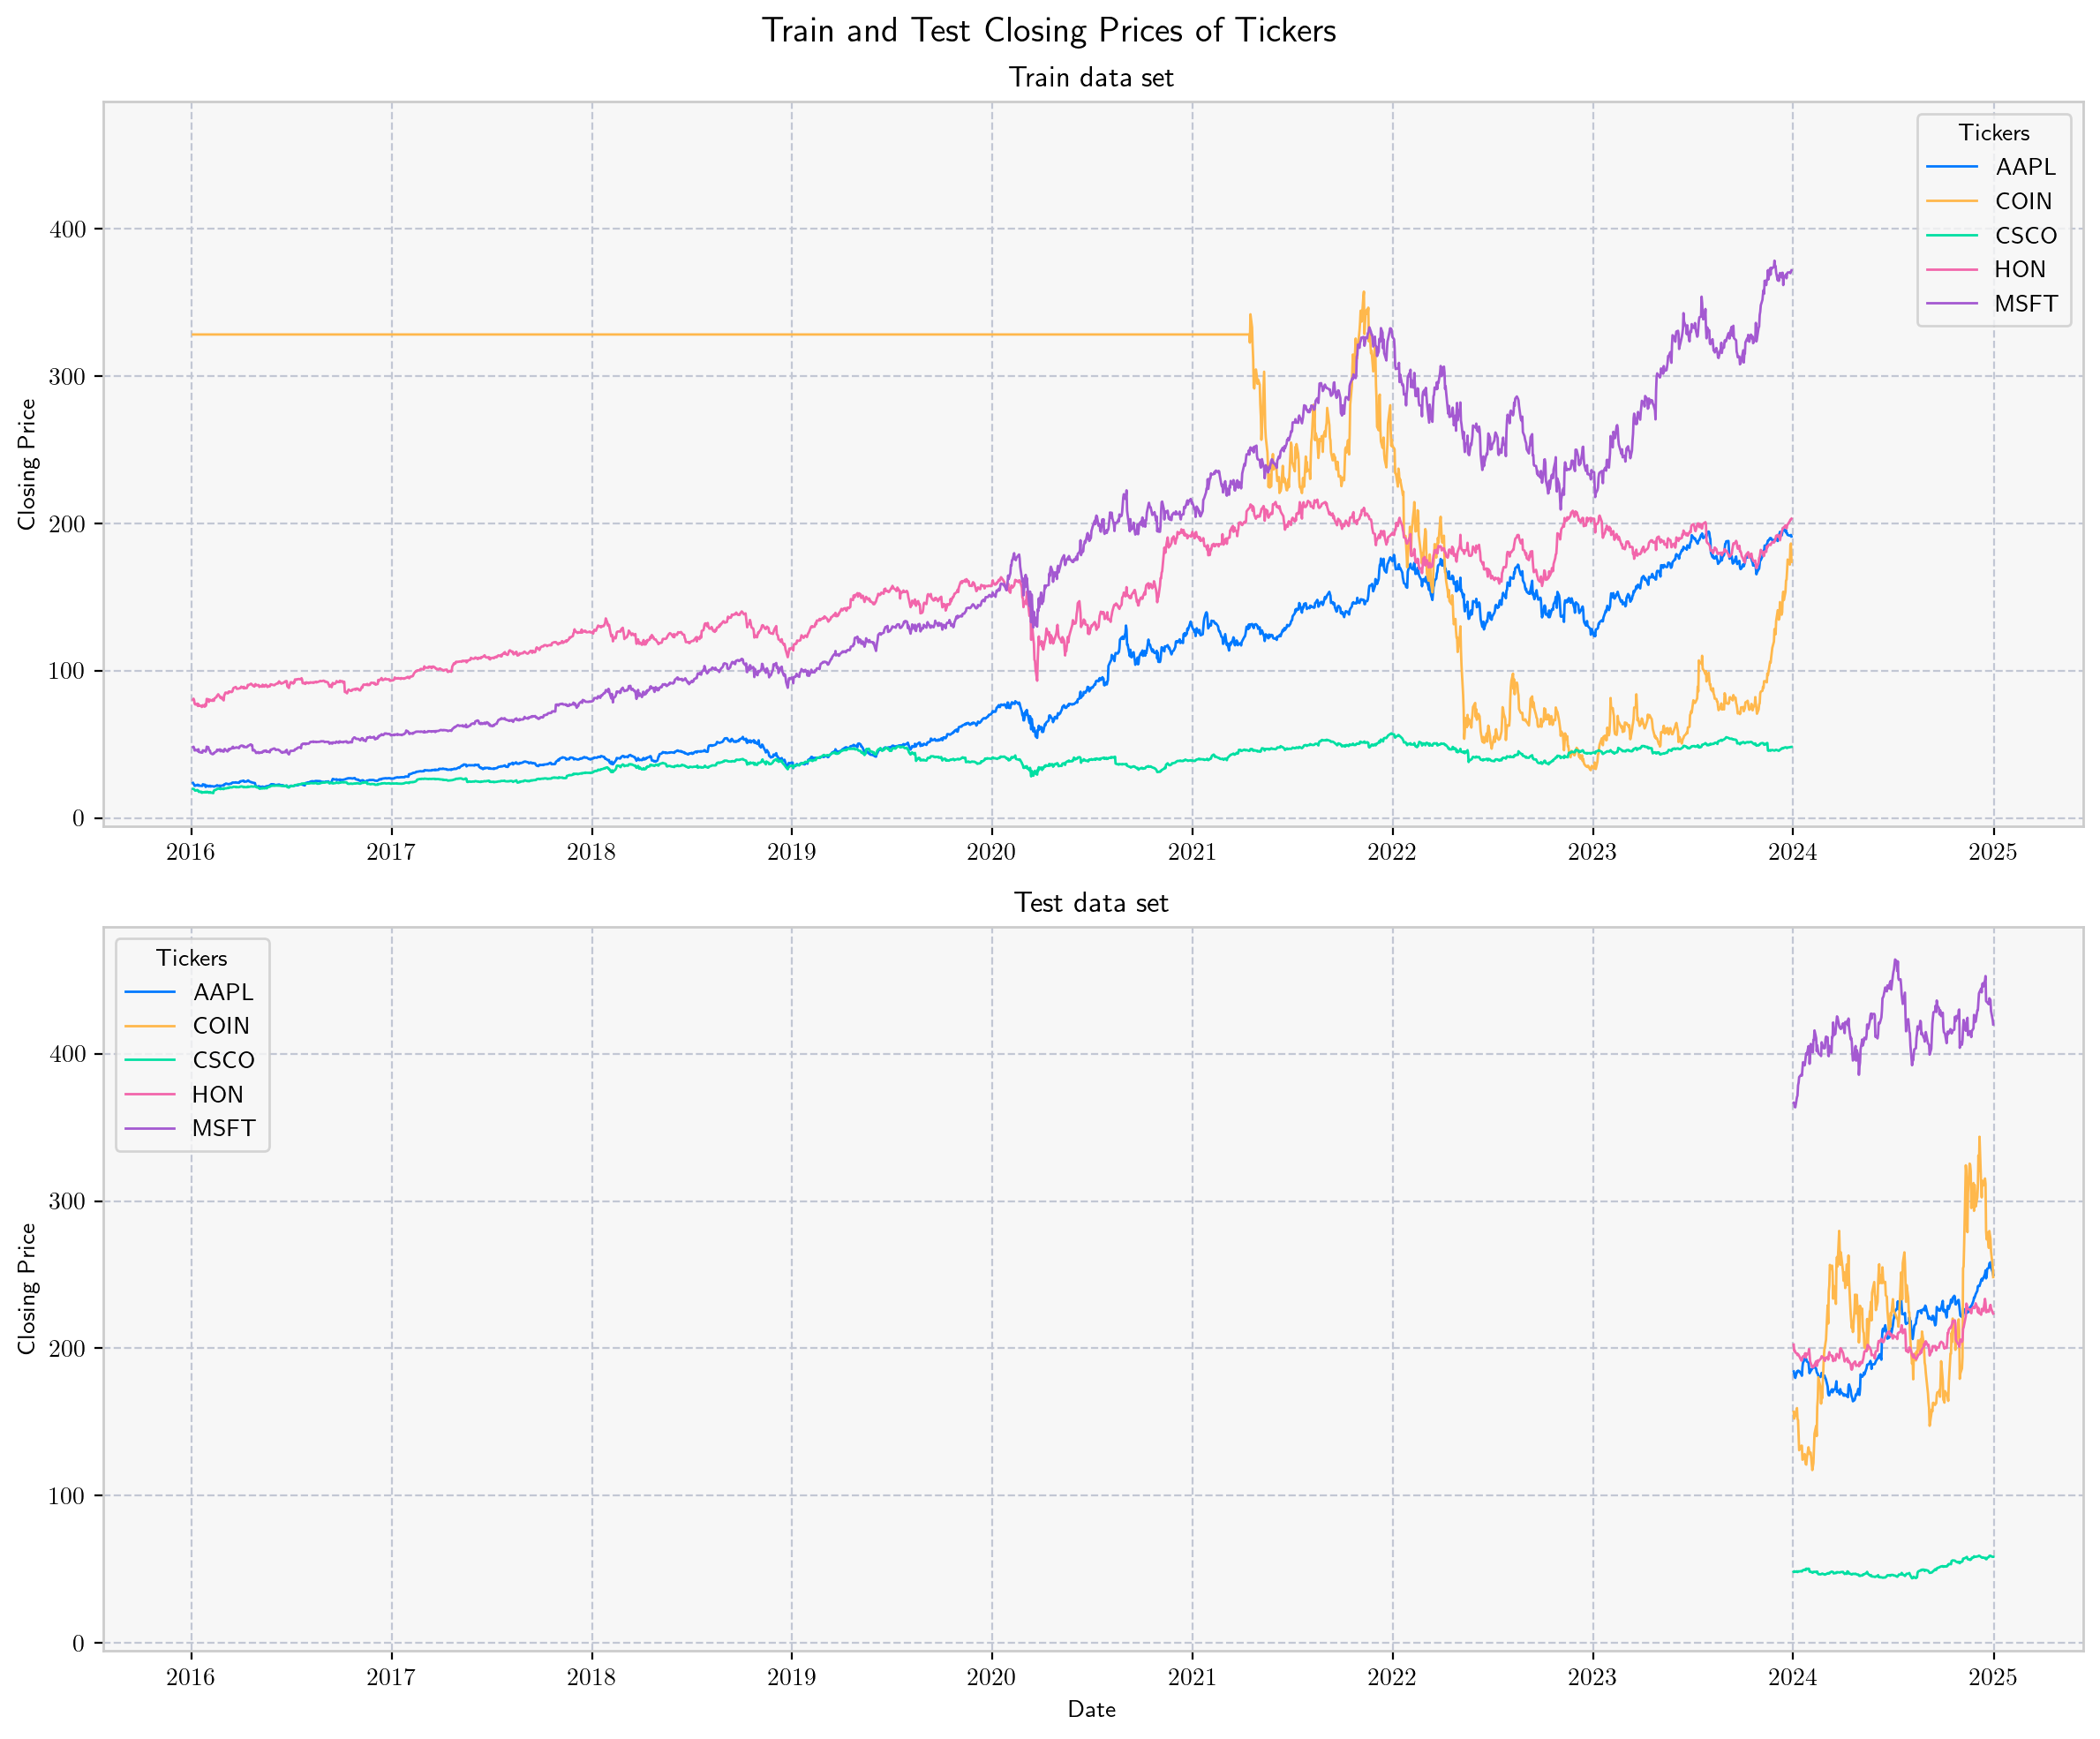

In [ ]:
finvisualiser = FinancialDataVisualiser()
finvisualiser.plot_train_test_close_prices(
    train_data, trade_data, "../" + config.PLOT_DIR, config.TEST_NAME
)

In [ ]:
environment = FinRLTradingEnv(
    train_data, trade_data, list(config_indicators.TECHNICAL_INDICATORS.keys())
)

Environment successfully created with 
	Stock dimension: 5 
	State space: 91


In [ ]:
env_train = environment.get_train_env()
gym_env, _ = environment.get_trade_env()

In [ ]:
model_visualiser = ModelVisualiser()

In [ ]:
def model_training_evaluation(model: str) -> None:
    """
    Evaluates the training of the model and plots the results.

    :param model: The name of the model to evaluate.
    """

    if model == "a2c":
        x = "time/iterations"
        y = [
            "train/reward",
            "train/policy_loss",
            "train/entropy_loss",
            "train/value_loss",
        ]
        title = [
            "Iterations vs Reward",
            "Iterations vs Policy Loss",
            "Iterations vs Entropy loss",
            "Iterations vs Value loss",
        ]
    elif model == "ppo":
        x = "time/iterations"
        y = [
            "train/reward",
            "train/policy_gradient_loss",
            "train/entropy_loss",
            "train/value_loss",
        ]
        title = [
            "Iterations vs Reward",
            "Iterations vs Policy Gradient Loss",
            "Iterations vs Entropy loss",
            "Iterations vs Value loss",
        ]
    elif model == "ddpg":
        x = "time/episodes"
        y = [
            "train/reward",
            "train/actor_loss",
            "train/critic_loss",
        ]
        title = [
            "Episodes vs Reward",
            "Episodes vs Actor Loss",
            "Episodes vs Critic Loss",
        ]
    elif model == "td3":
        x = "time/episodes"
        y = [
            "train/reward",
            "train/actor_loss",
            "train/critic_loss",
        ]
        title = [
            "Episodes vs Reward",
            "Episodes vs Actor Loss",
            "Episodes vs Critic Loss",
        ]
    elif model == "sac":
        x = "time/episodes"
        y = [
            "train/reward",
            "train/actor_loss",
            "train/critic_loss",
            "train/ent_coef_loss",
        ]
        title = [
            "Episodes vs Reward",
            "Episodes vs Actor Loss",
            "Episodes vs Critic Loss",
            "Episodes vs Entropy Coefficient Loss",
        ]

    model_visualiser.evaluate_training(
        model,
        x=x,
        y=y,
        title=title,
        directory="../" + config.PLOT_DIR,
        filename=config.TEST_NAME,
    )

Loading model: a2c


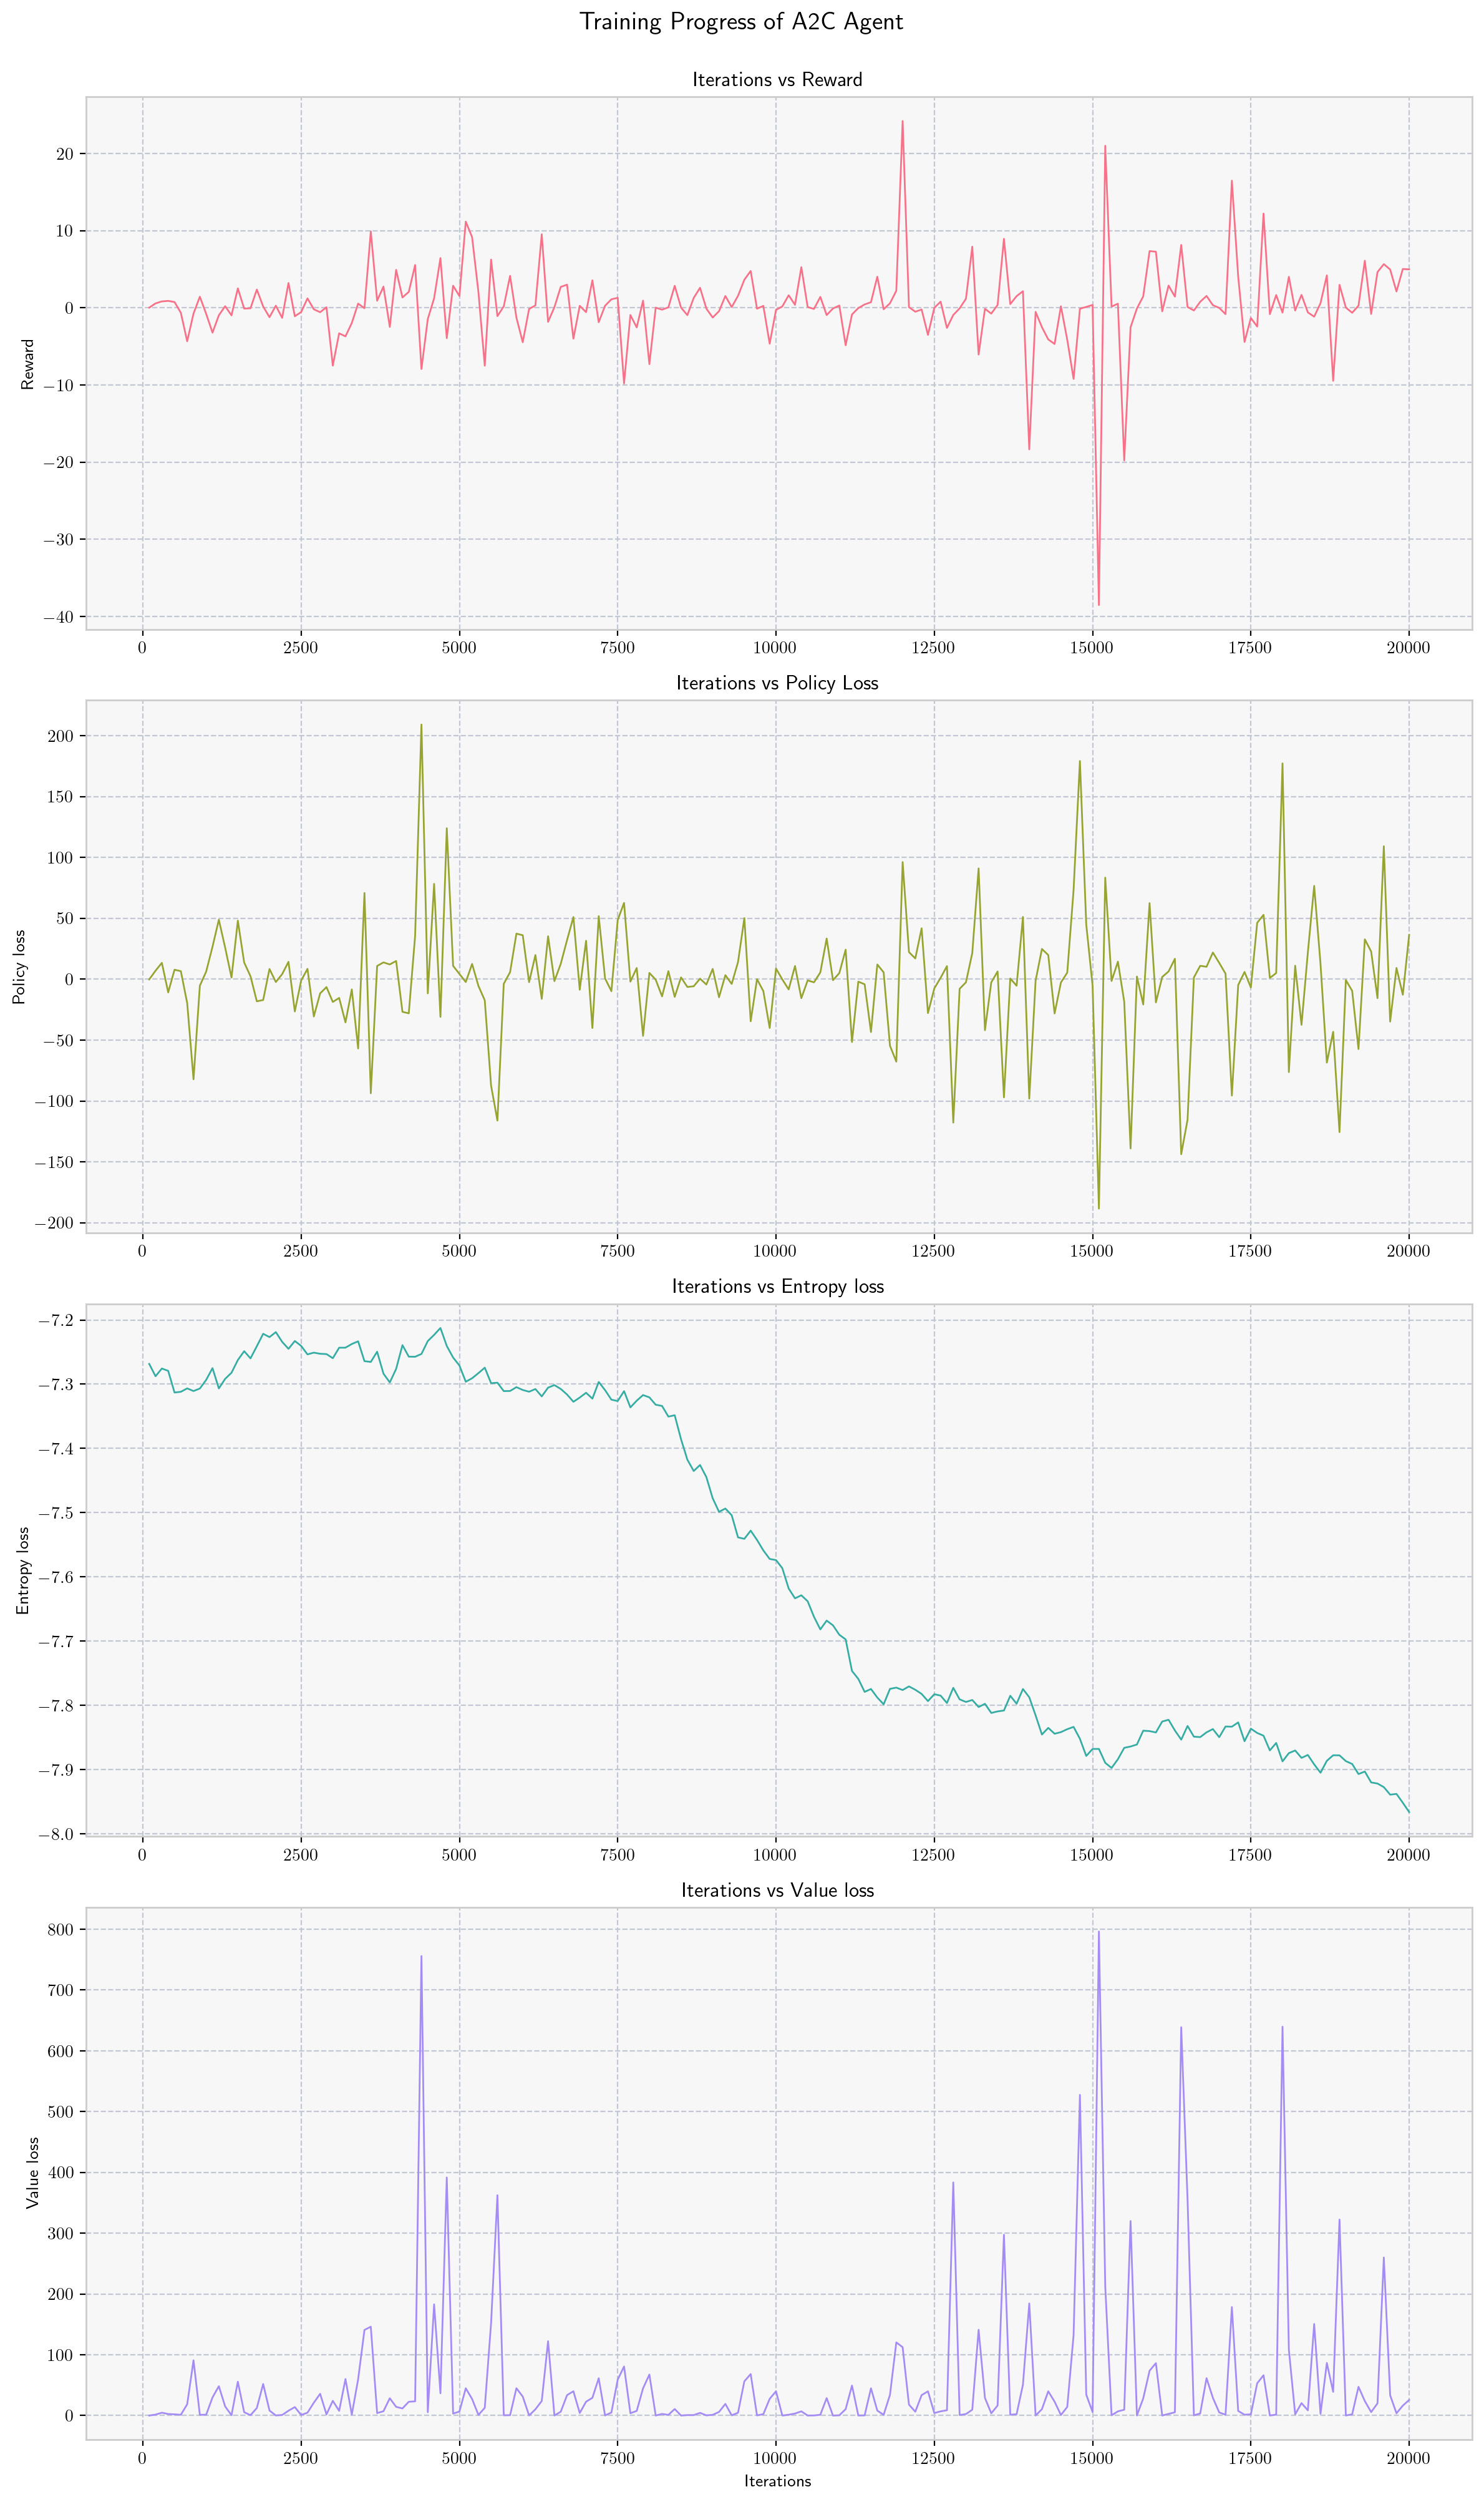

Evaluating model: A2C


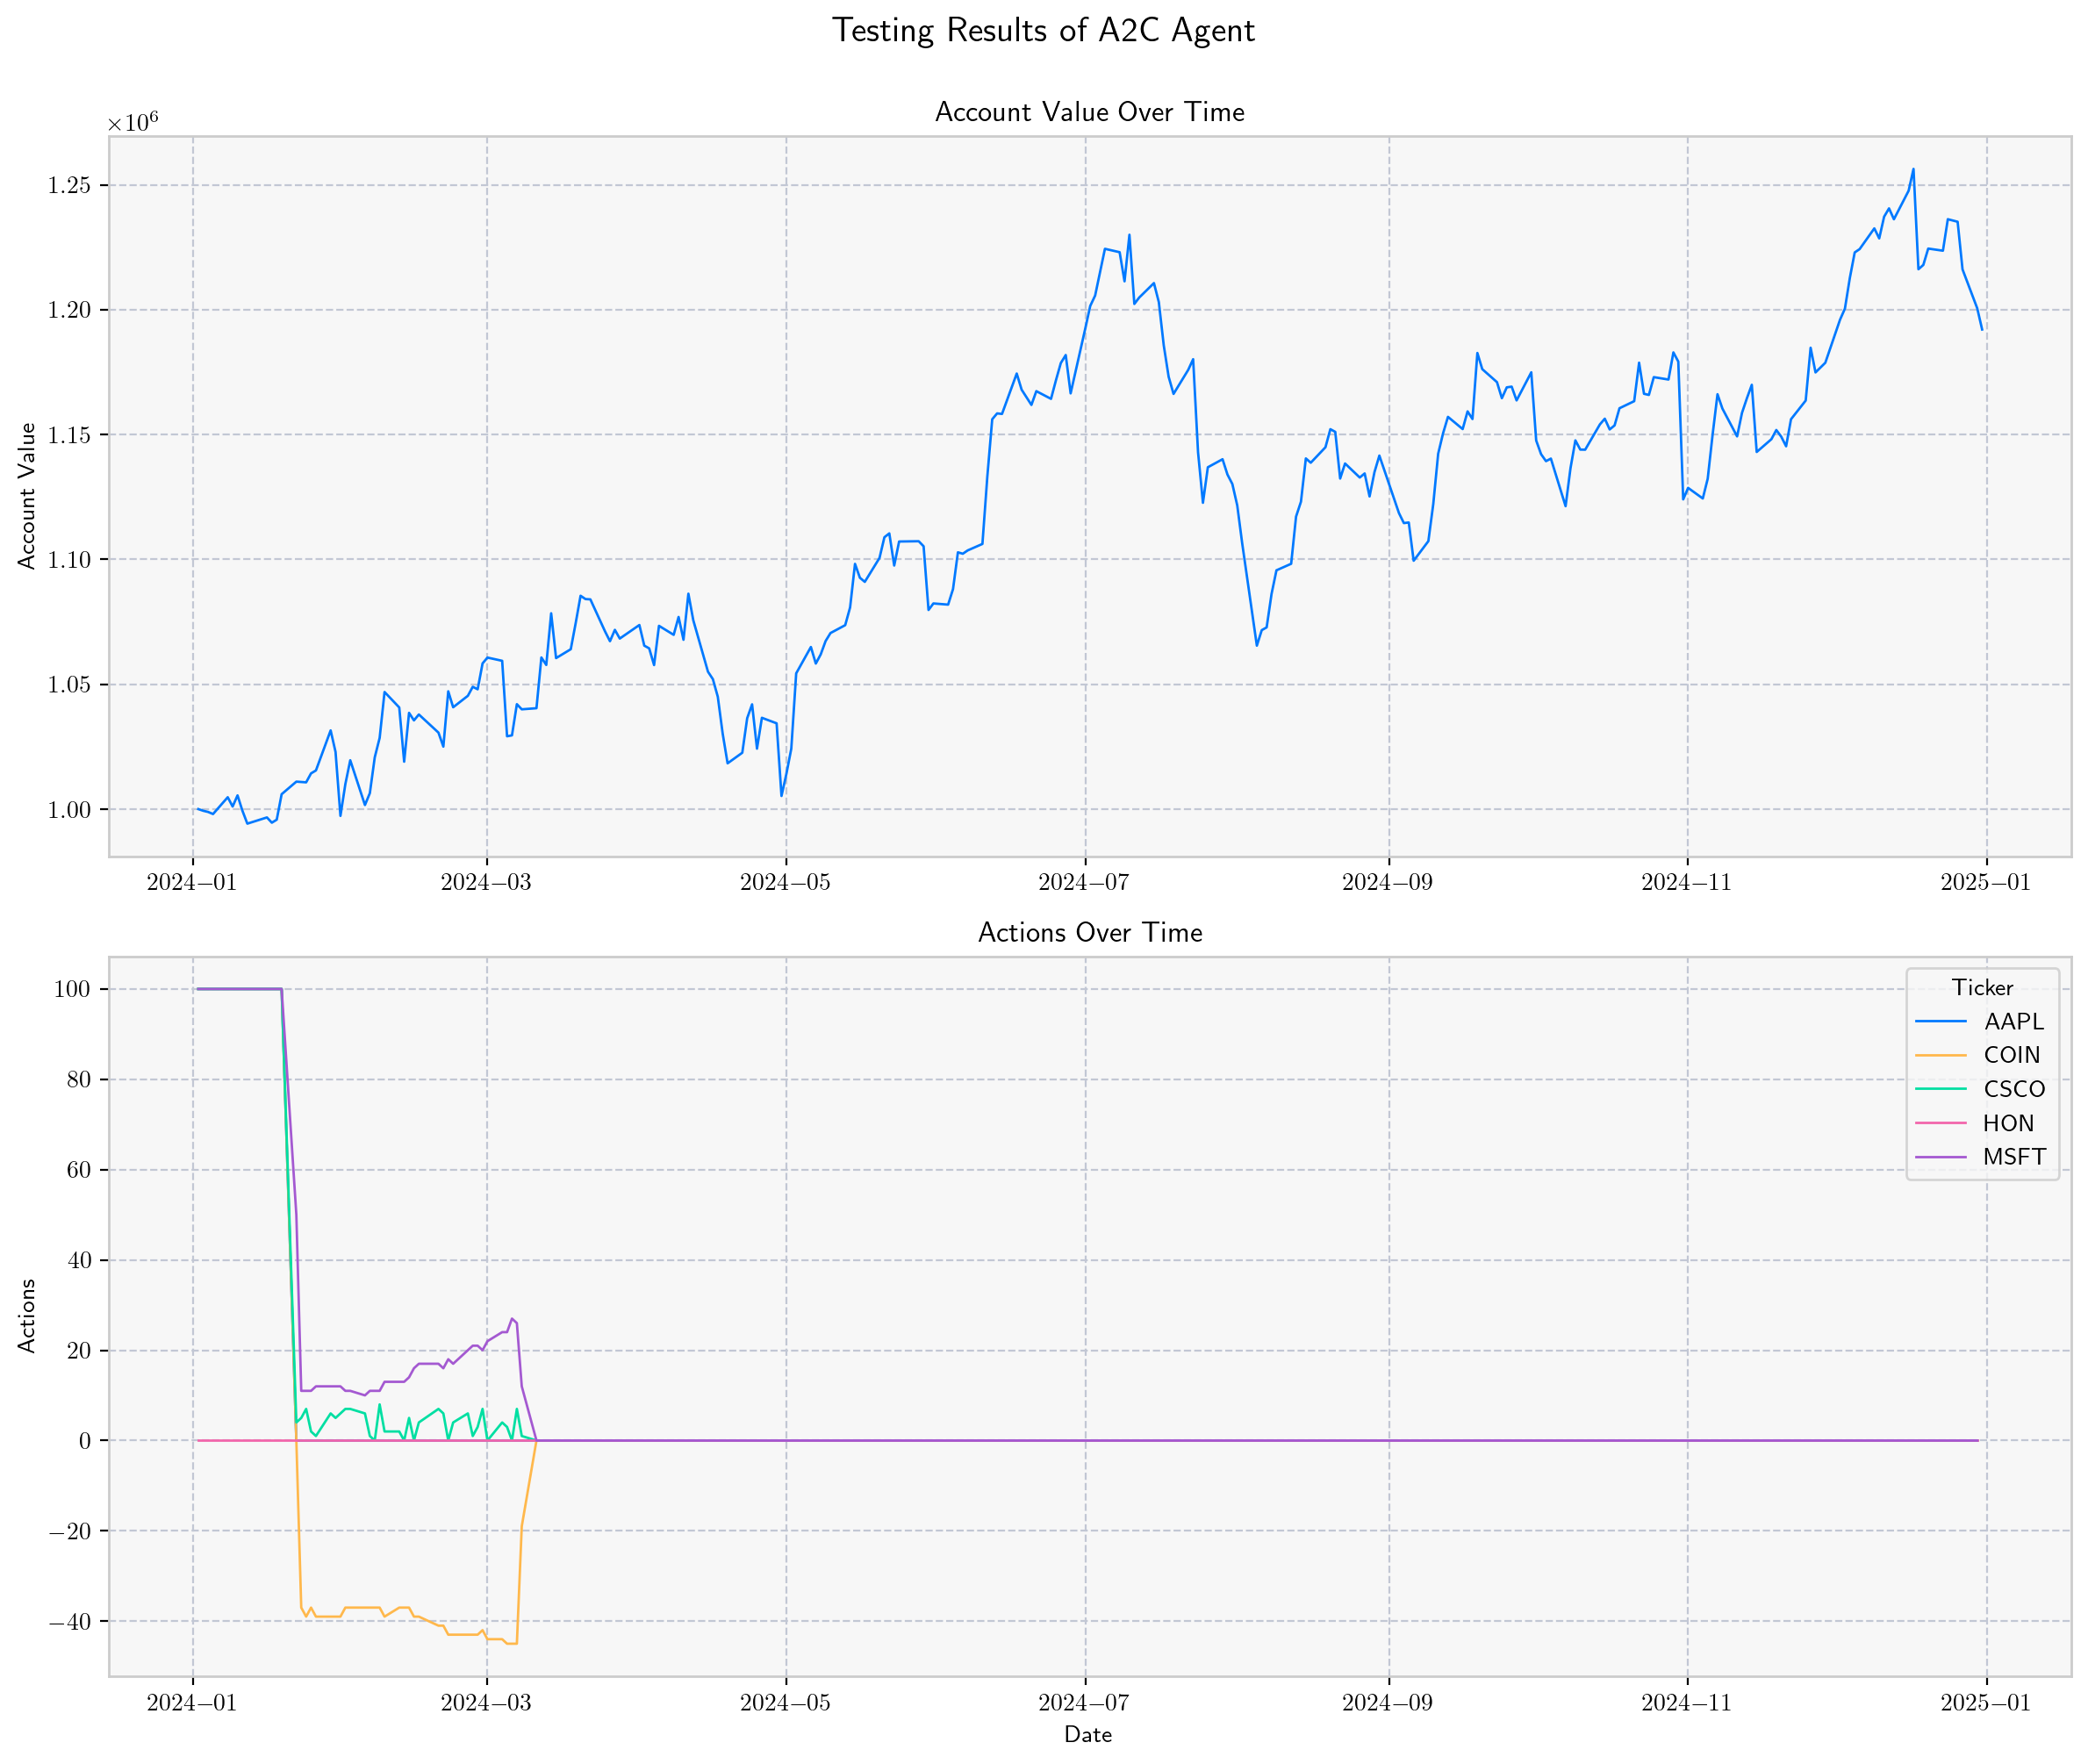

Loading model: ppo


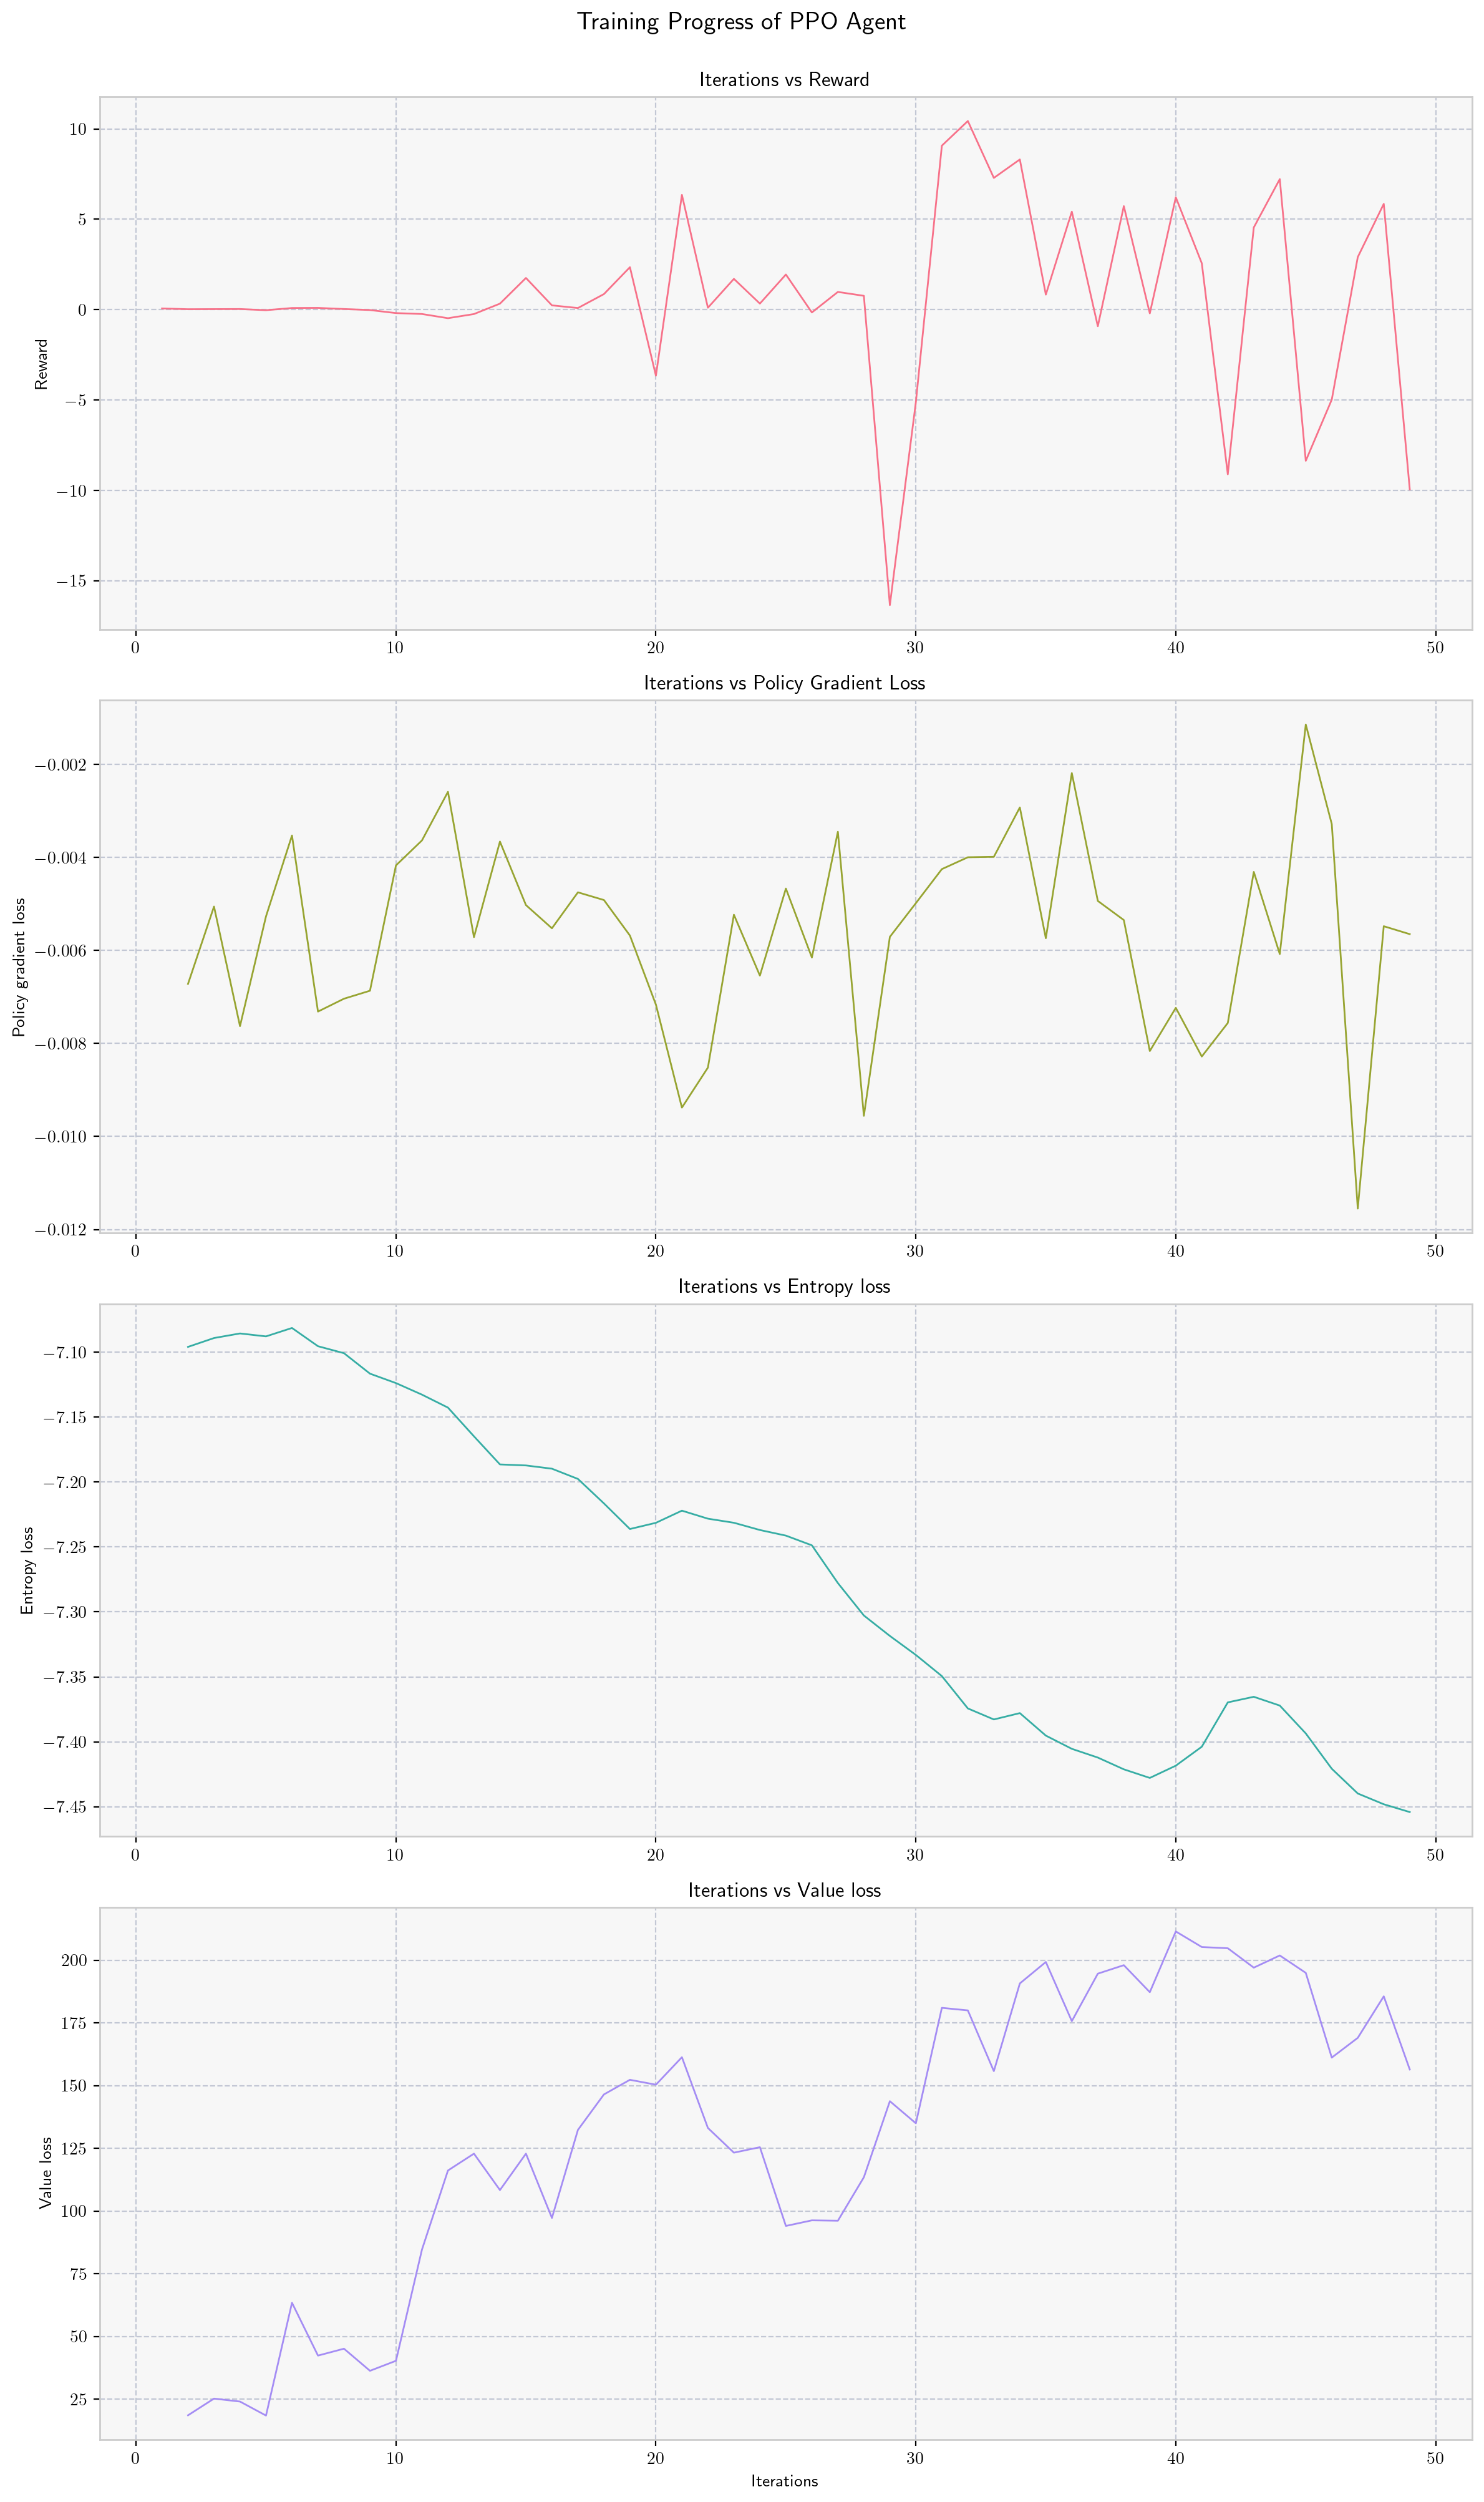

Evaluating model: PPO


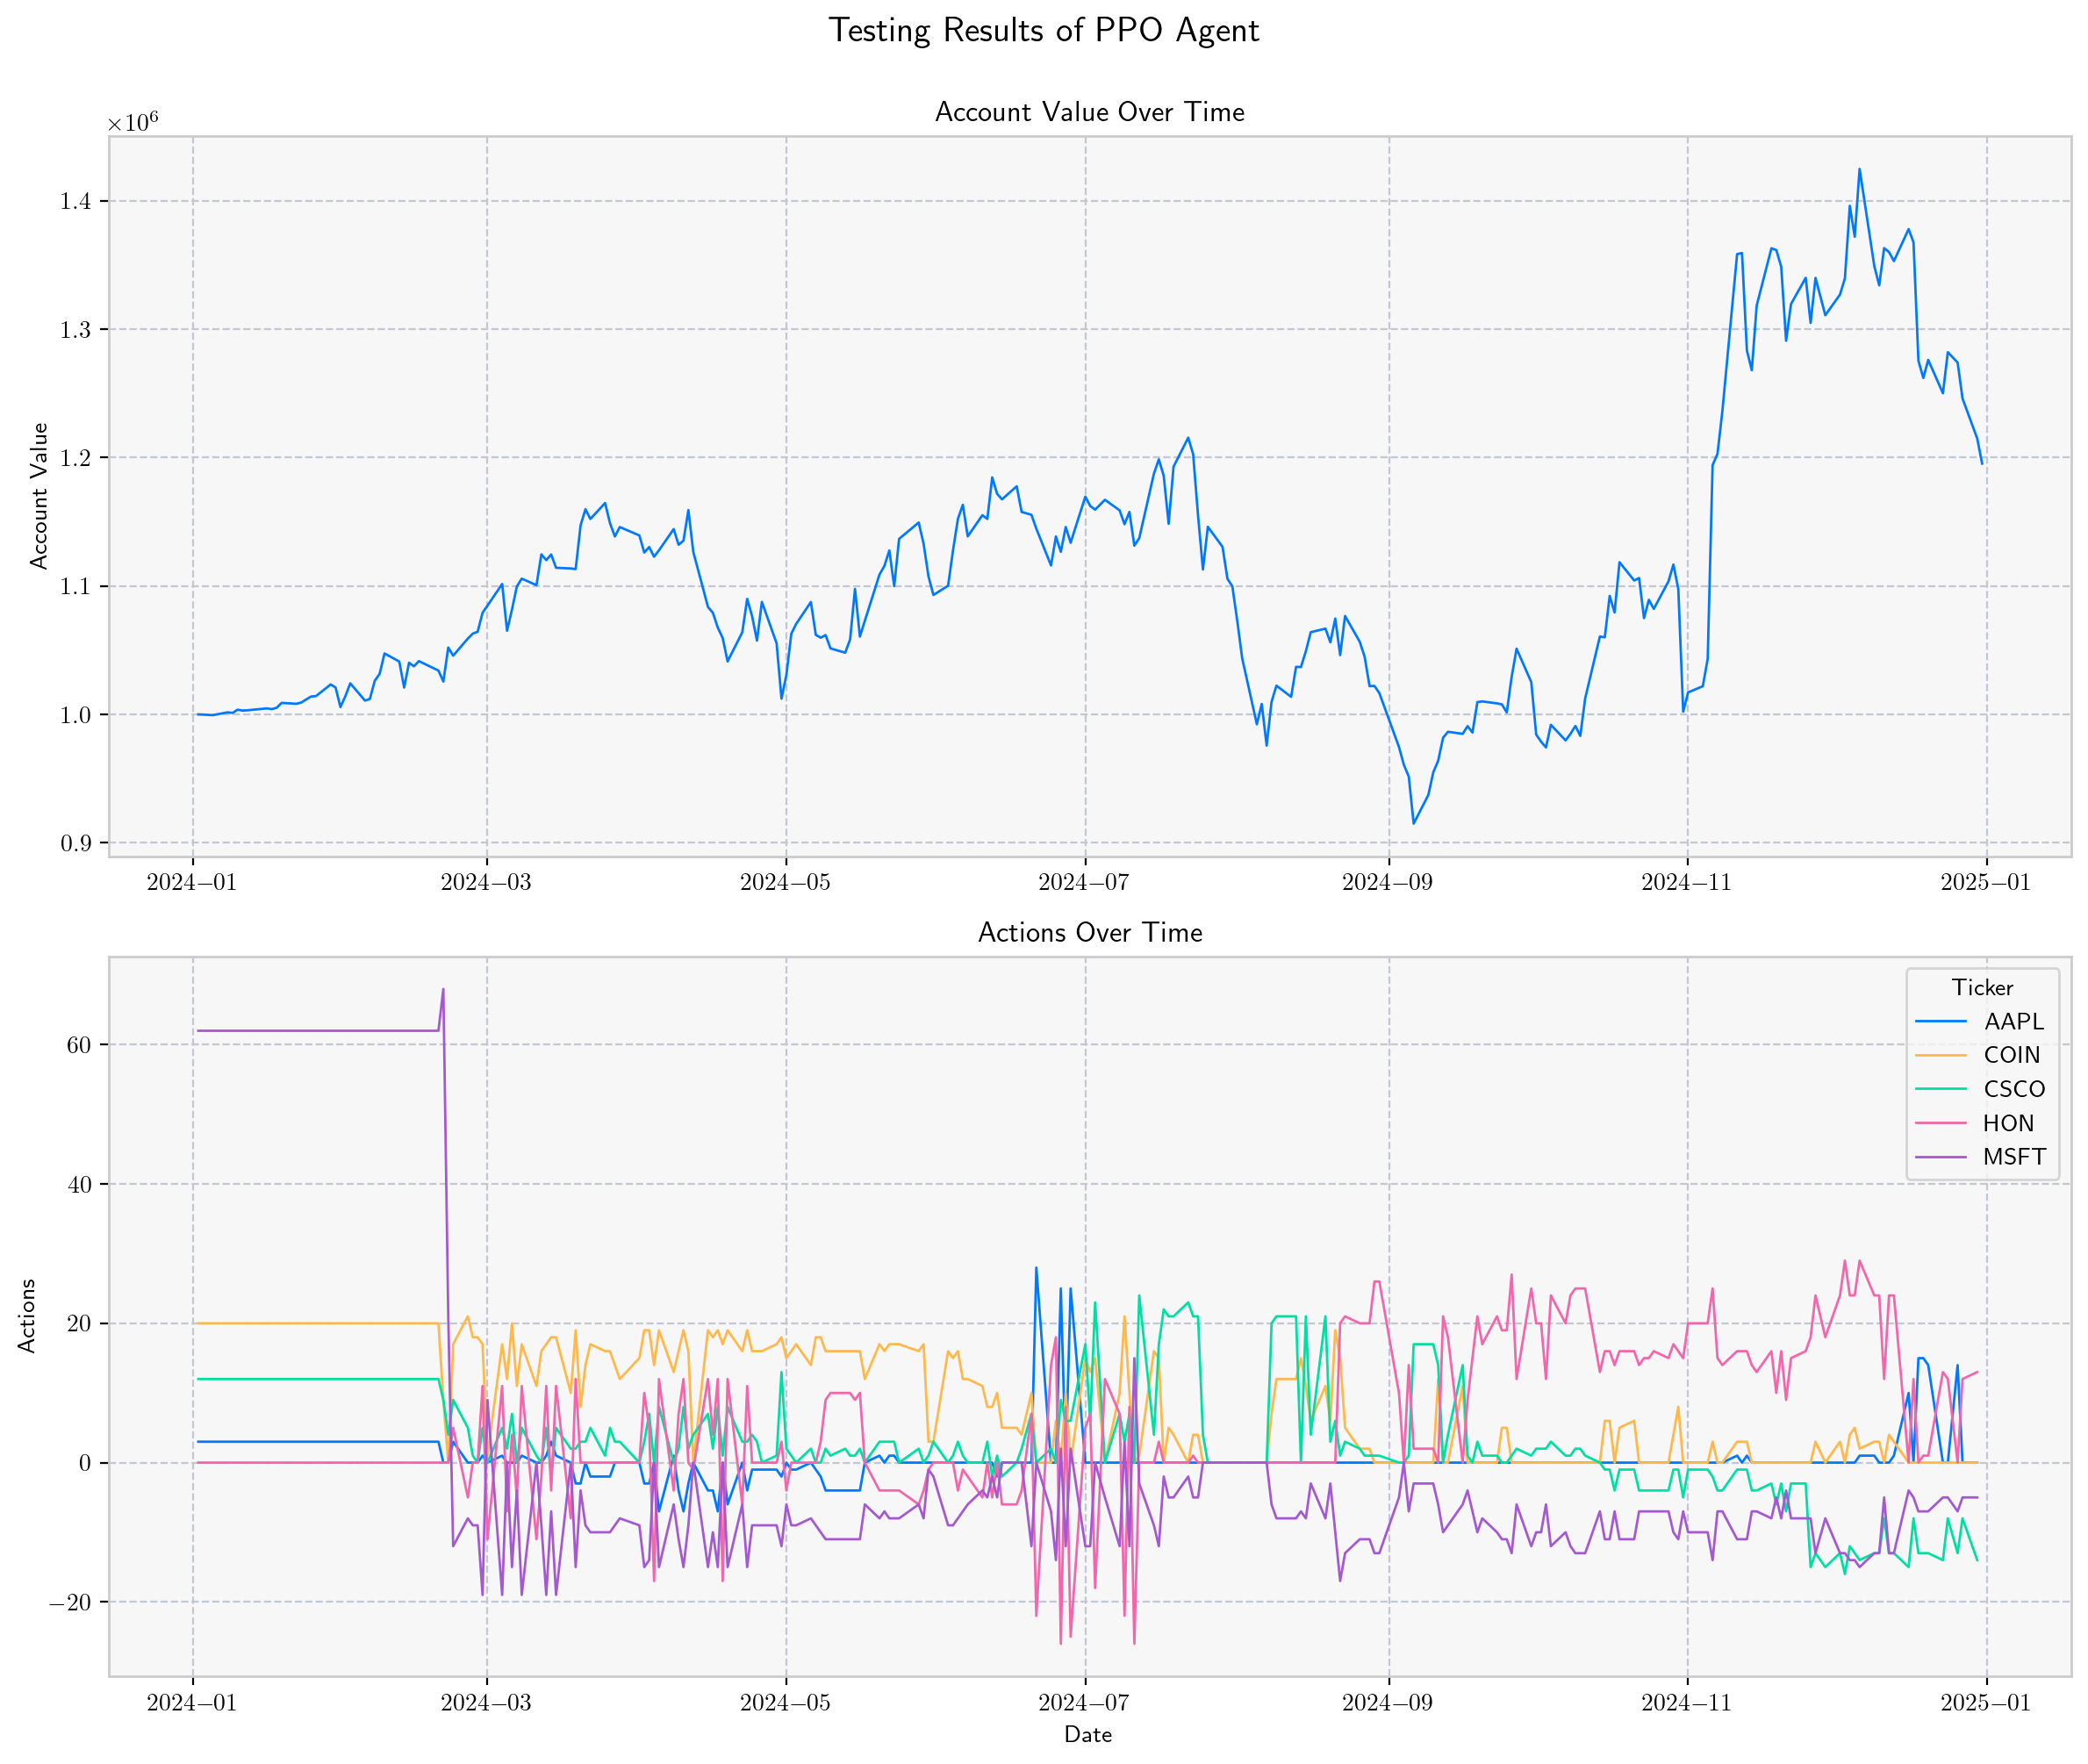

Loading model: ddpg


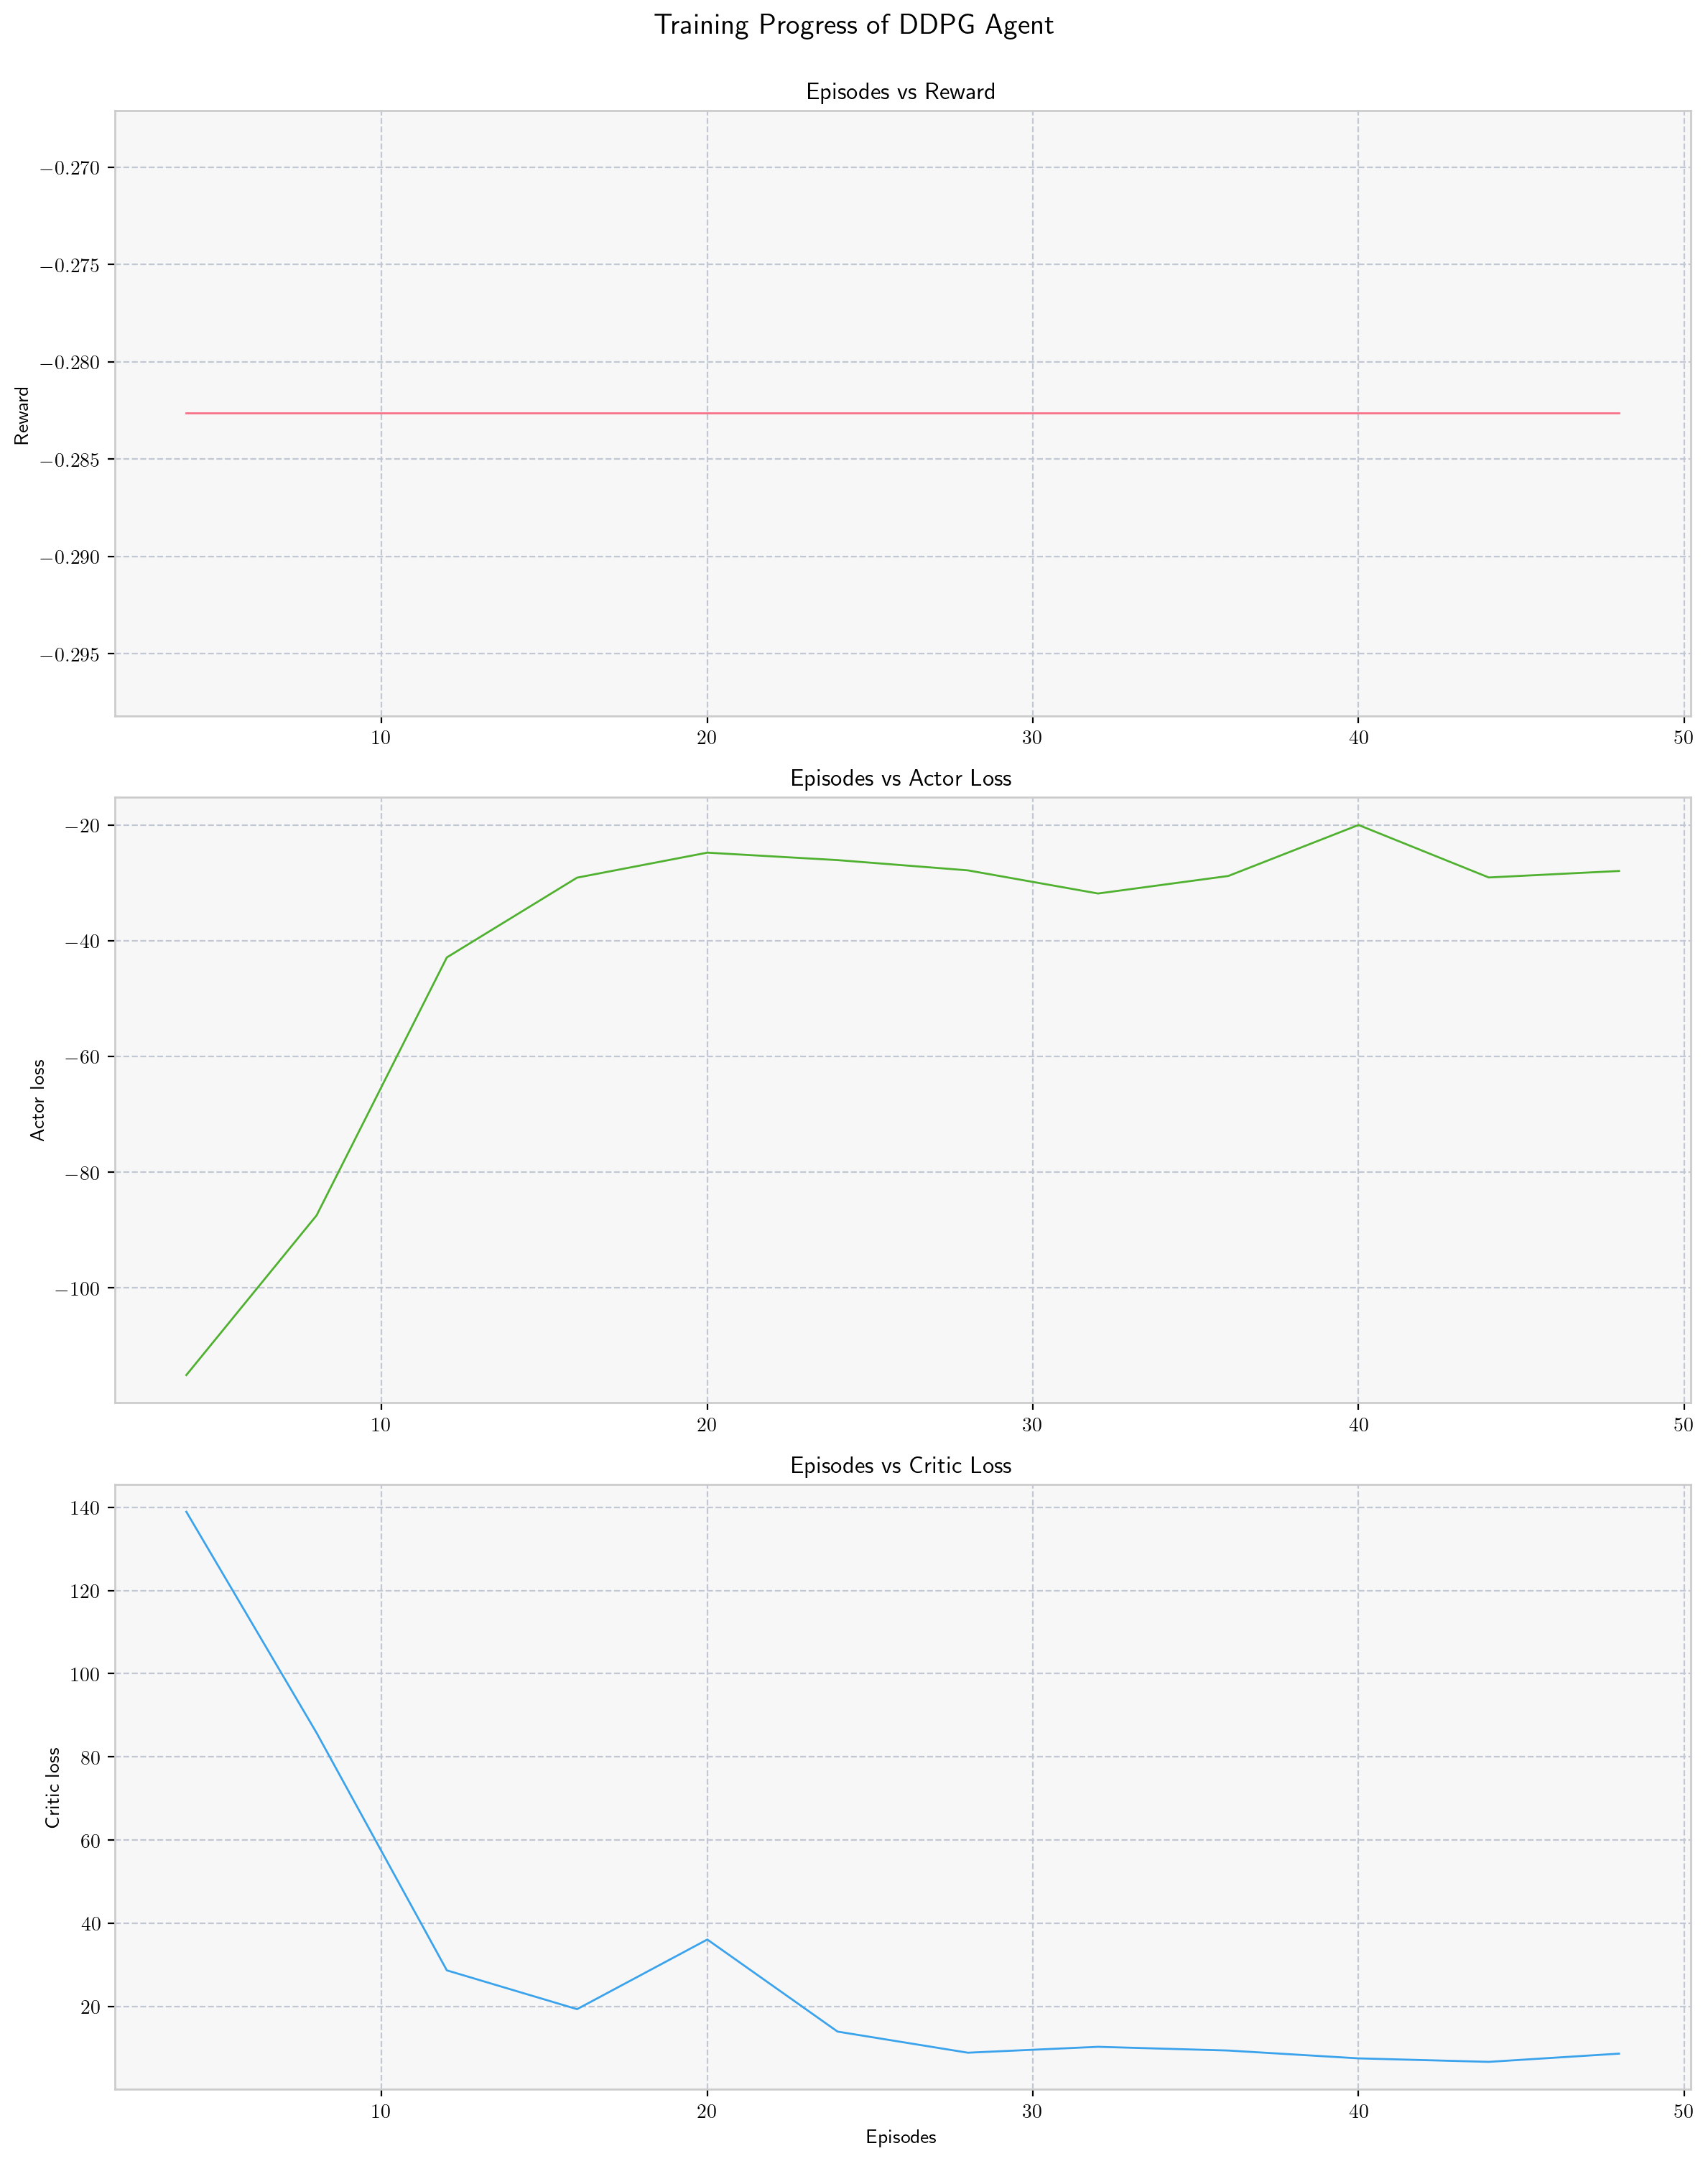

Evaluating model: DDPG


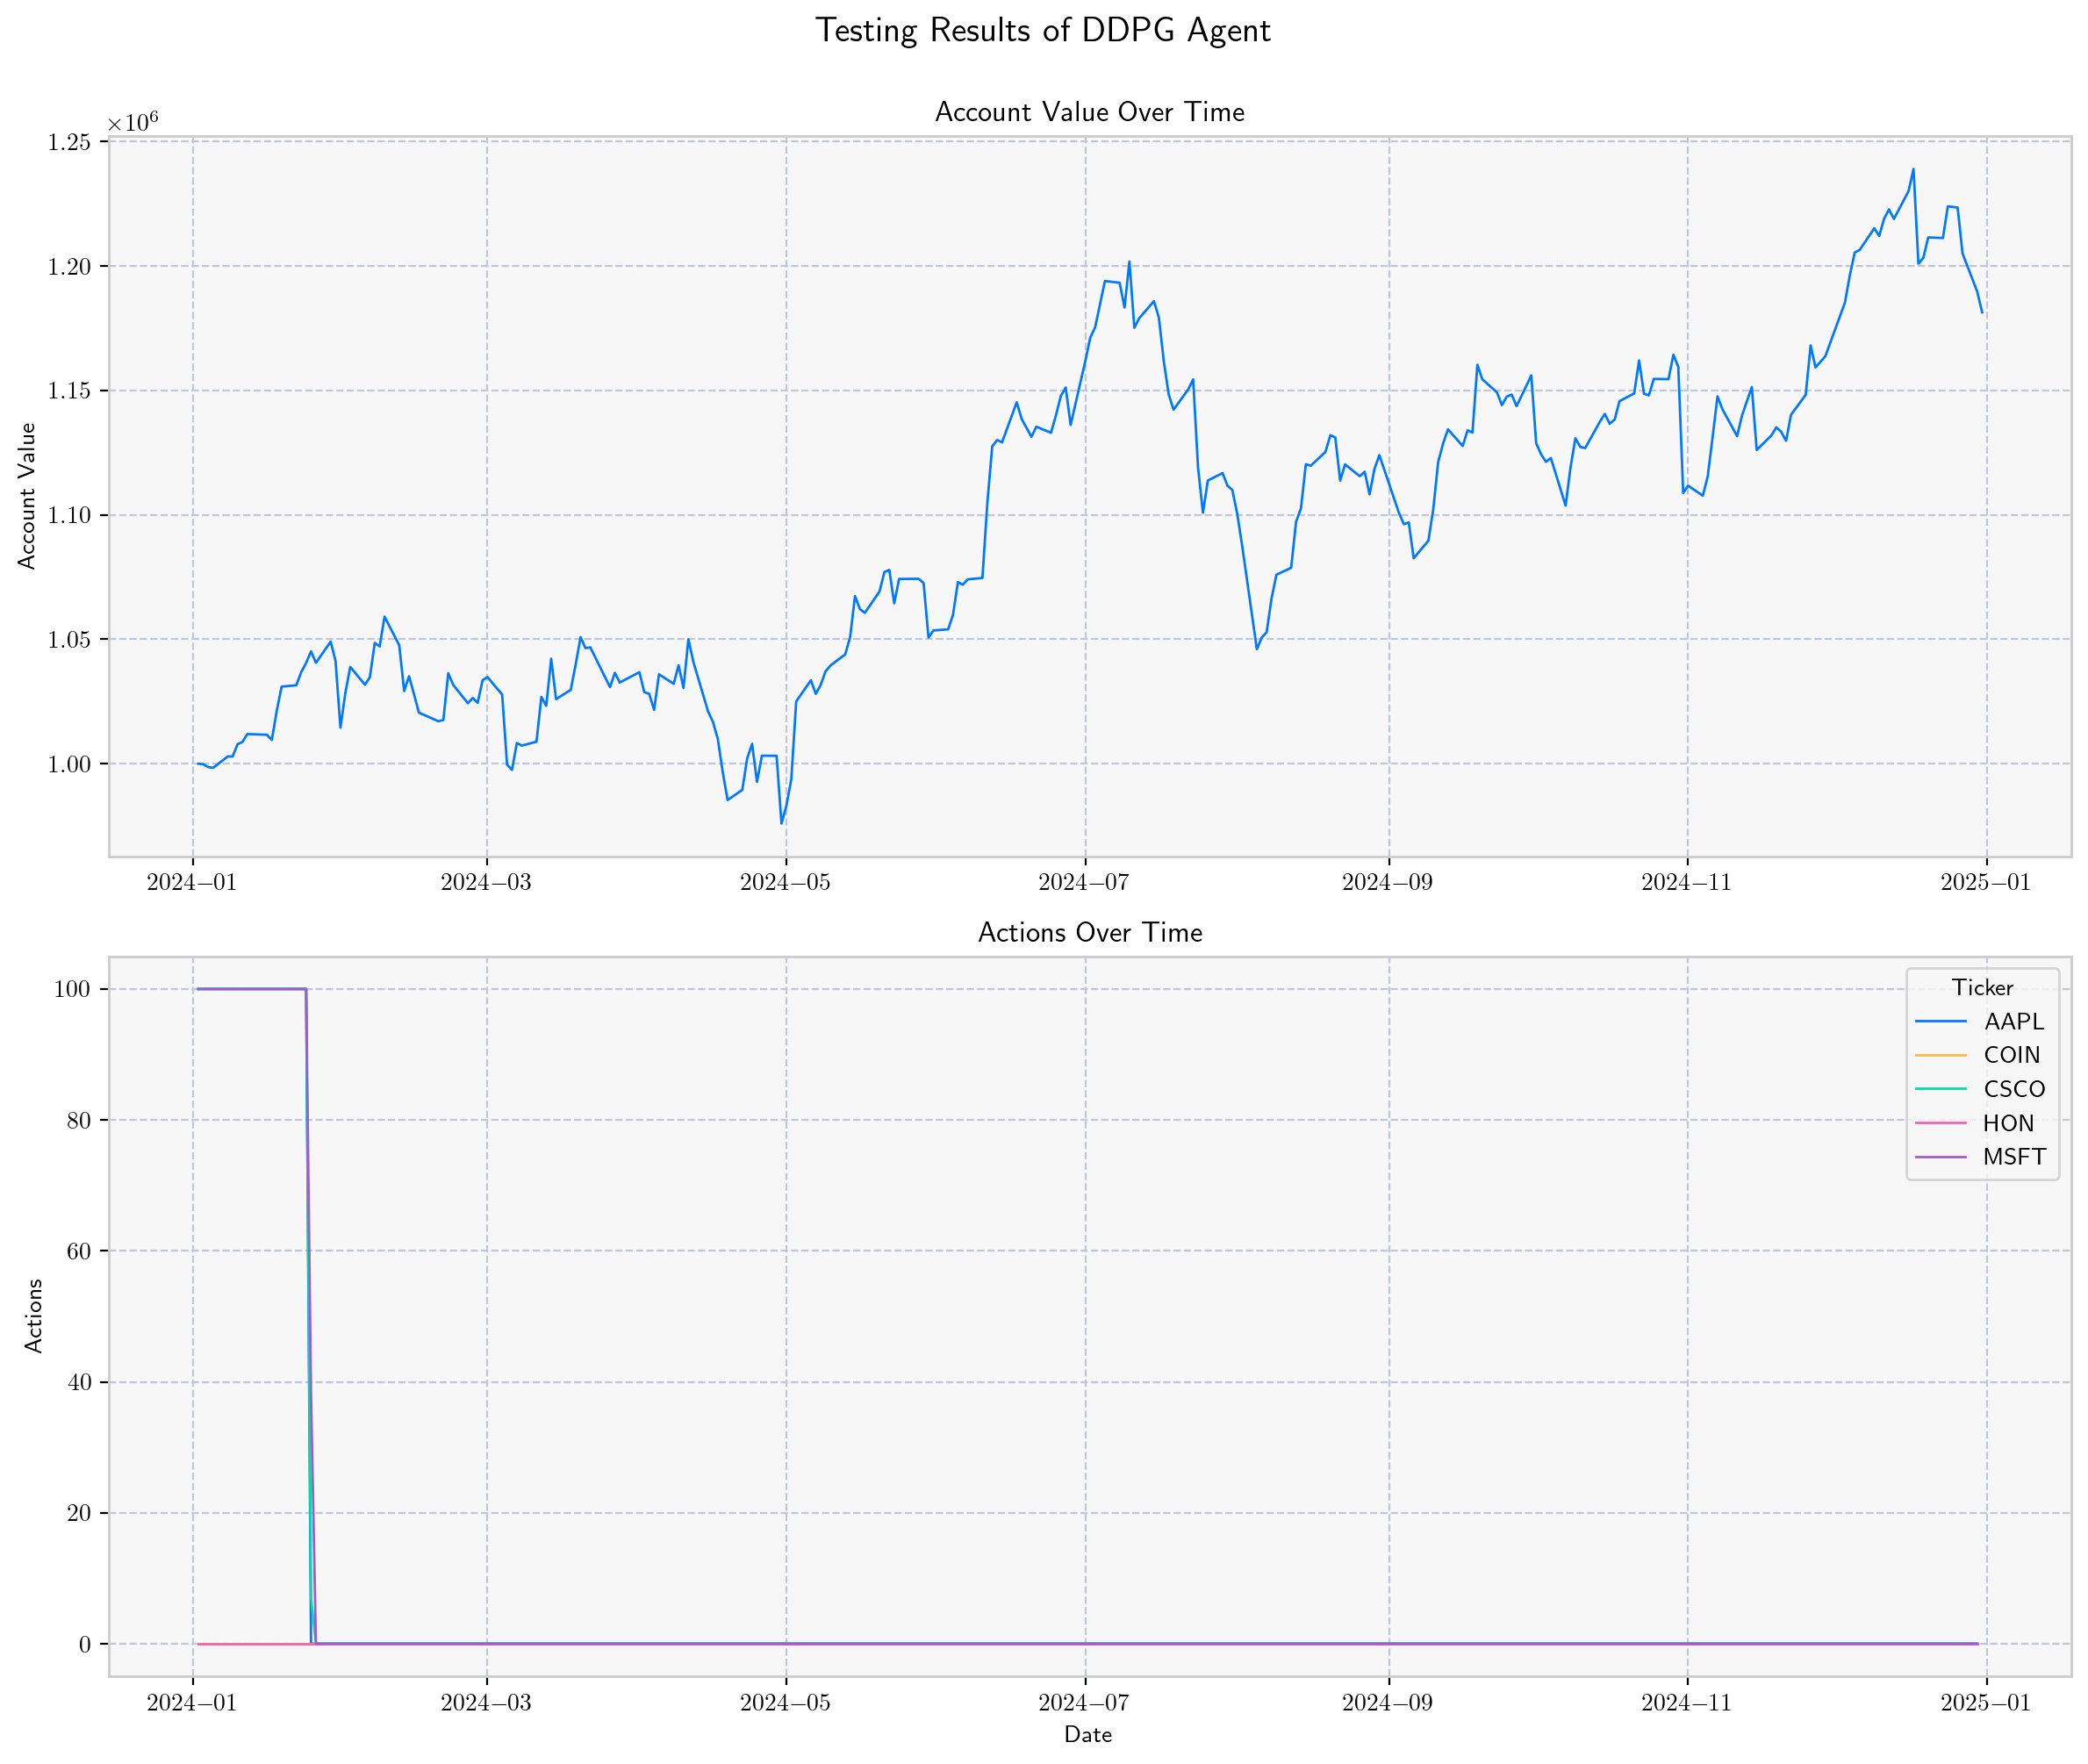

Loading model: td3


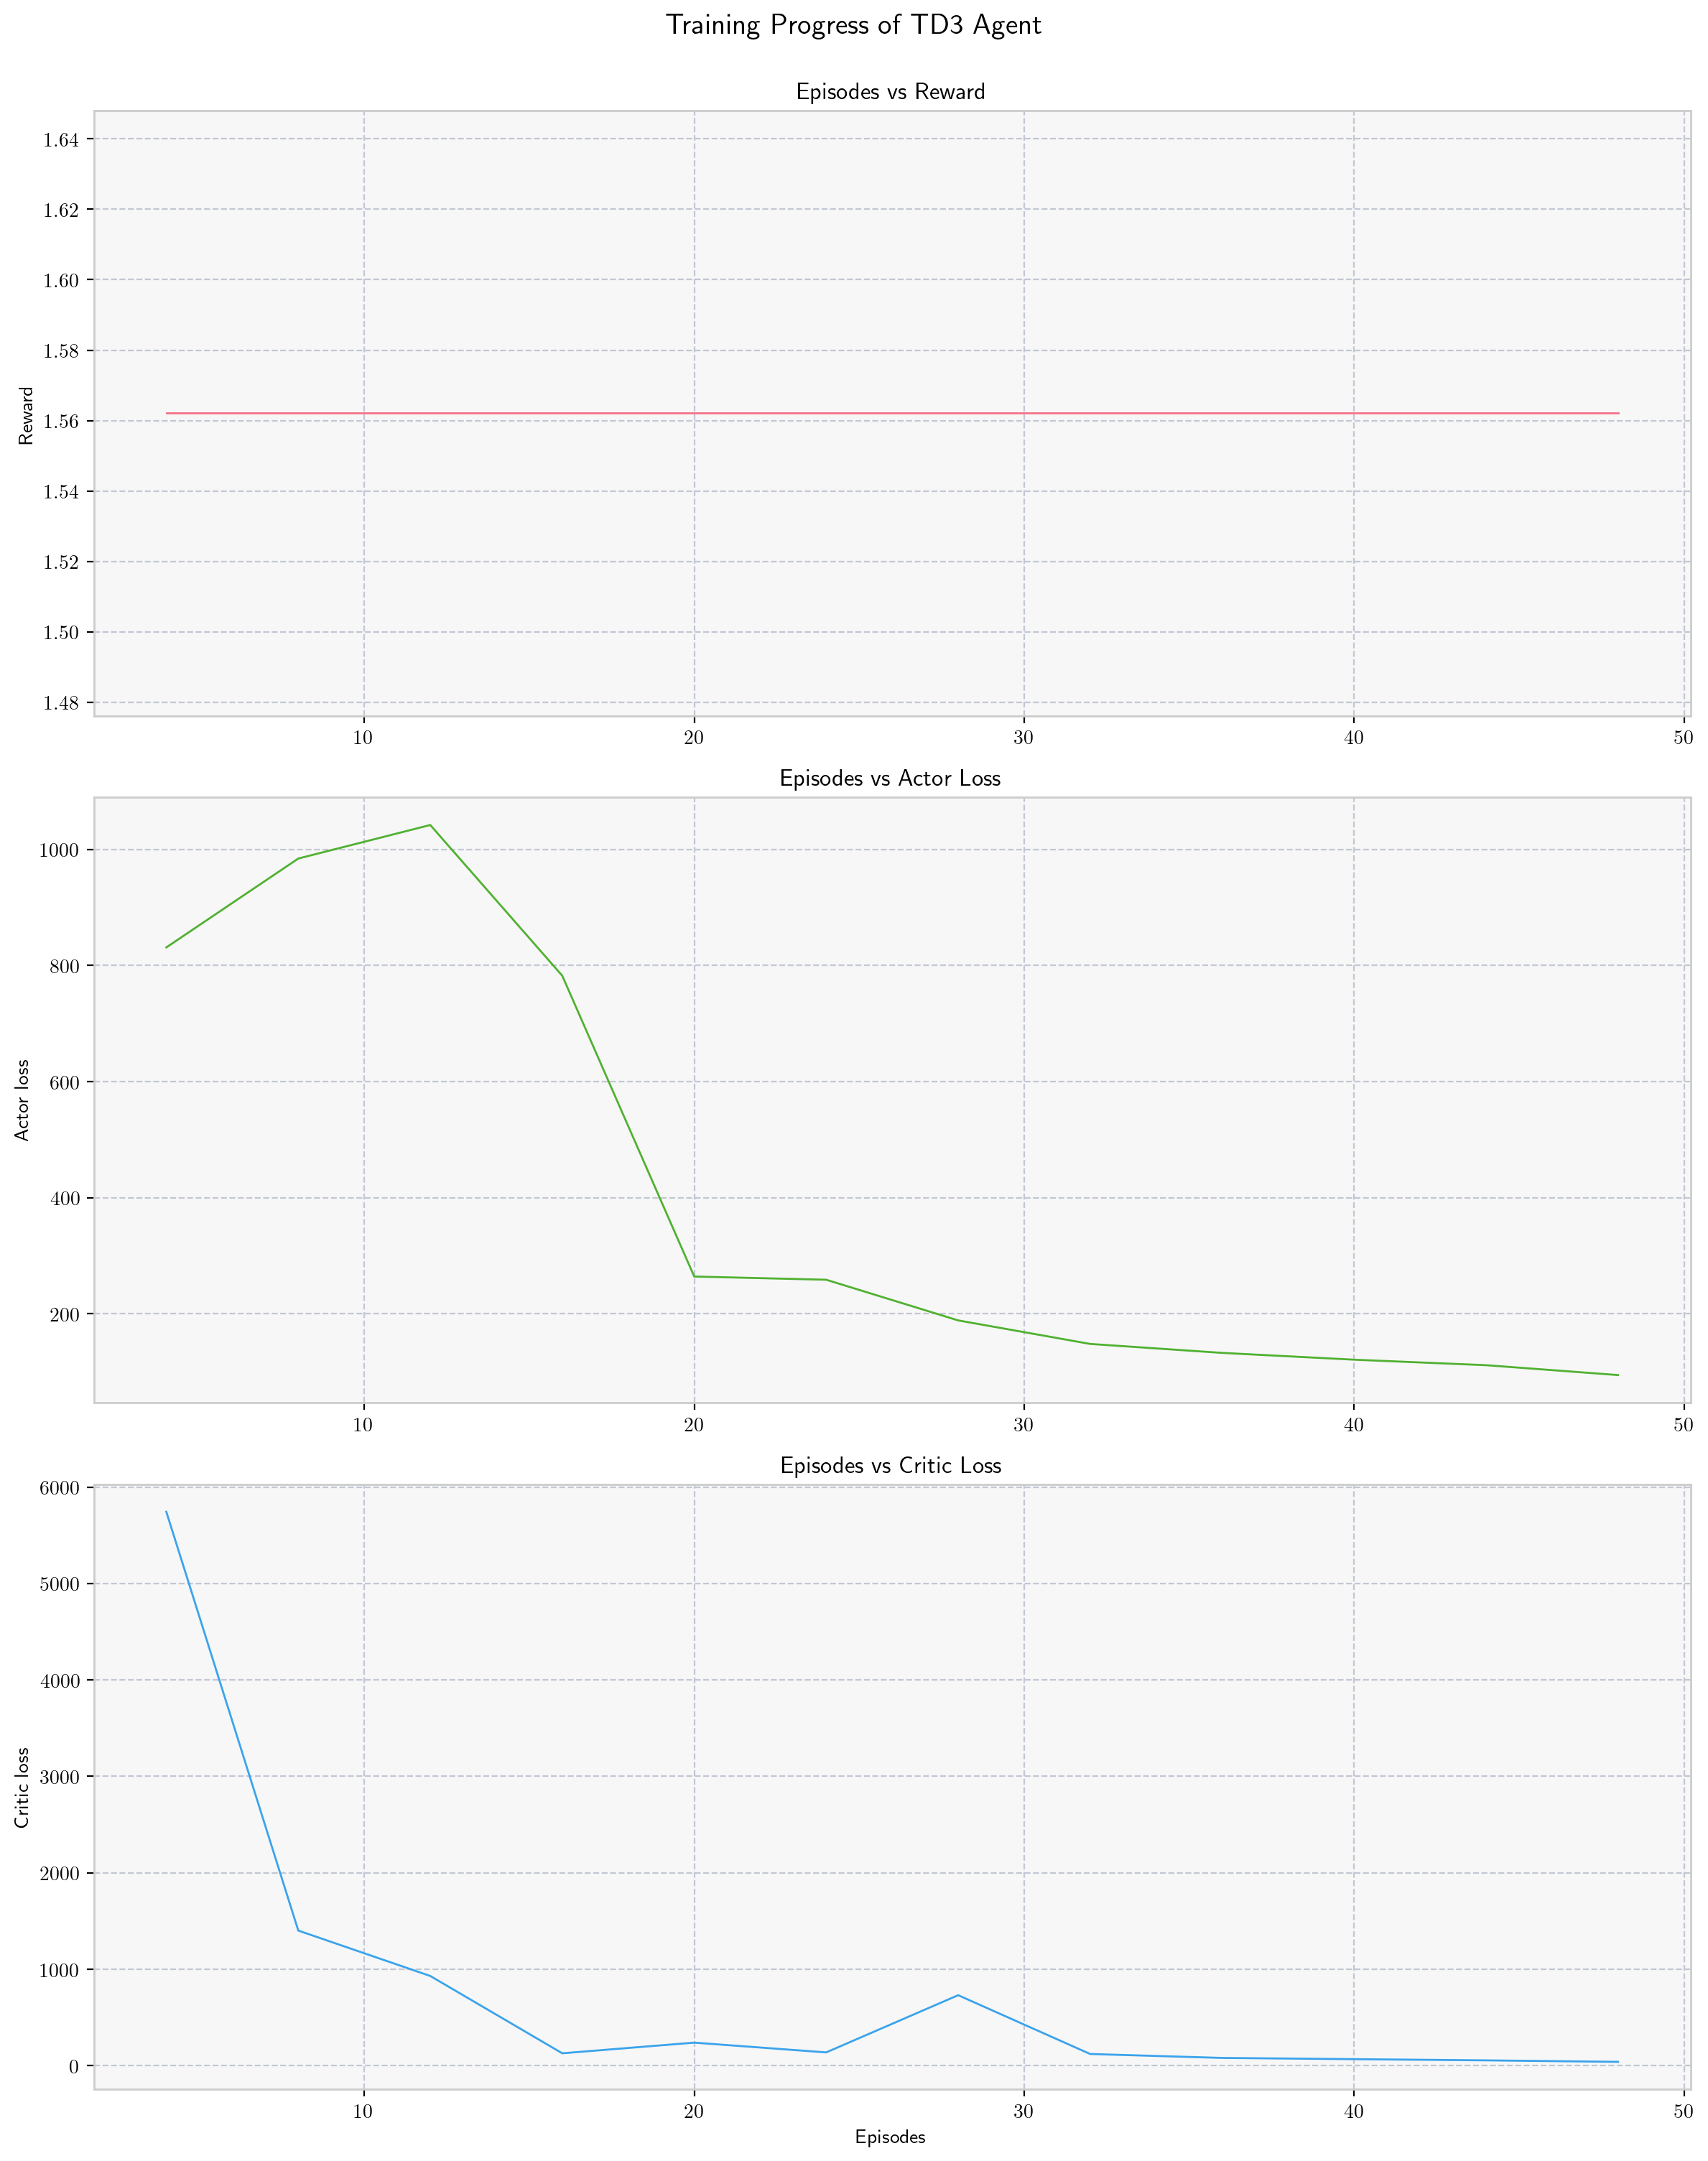

Evaluating model: TD3


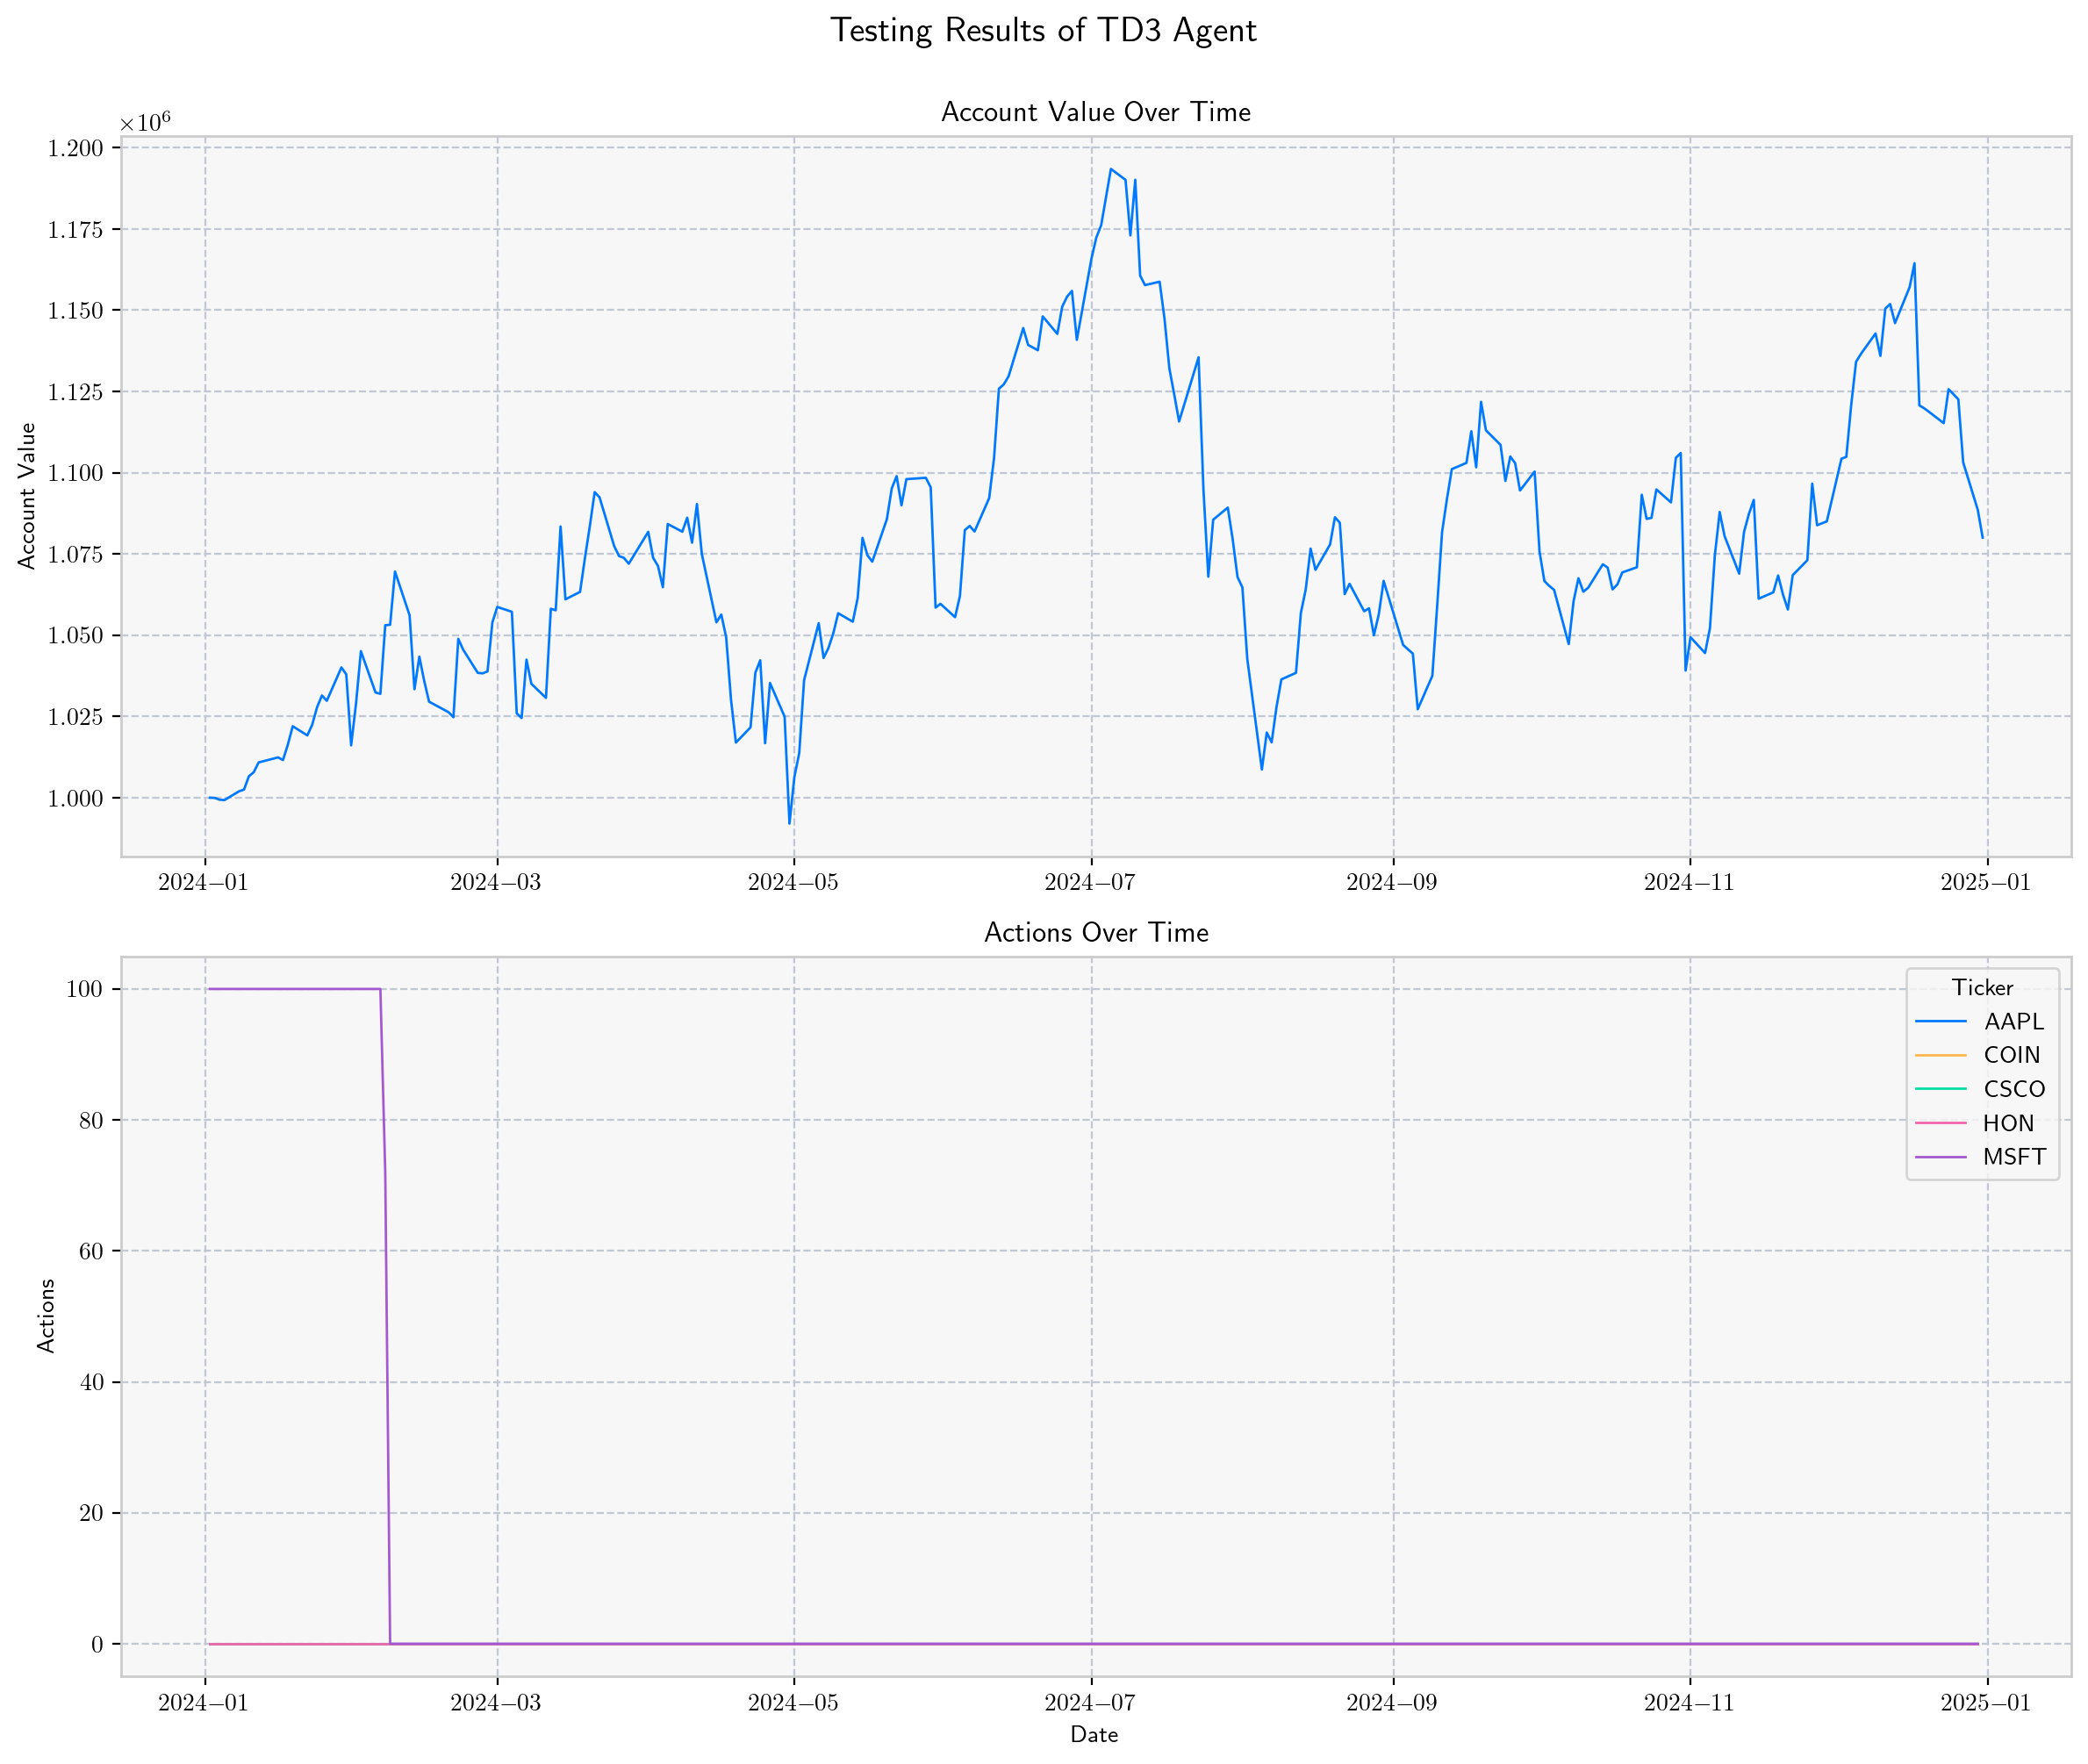

Loading model: sac


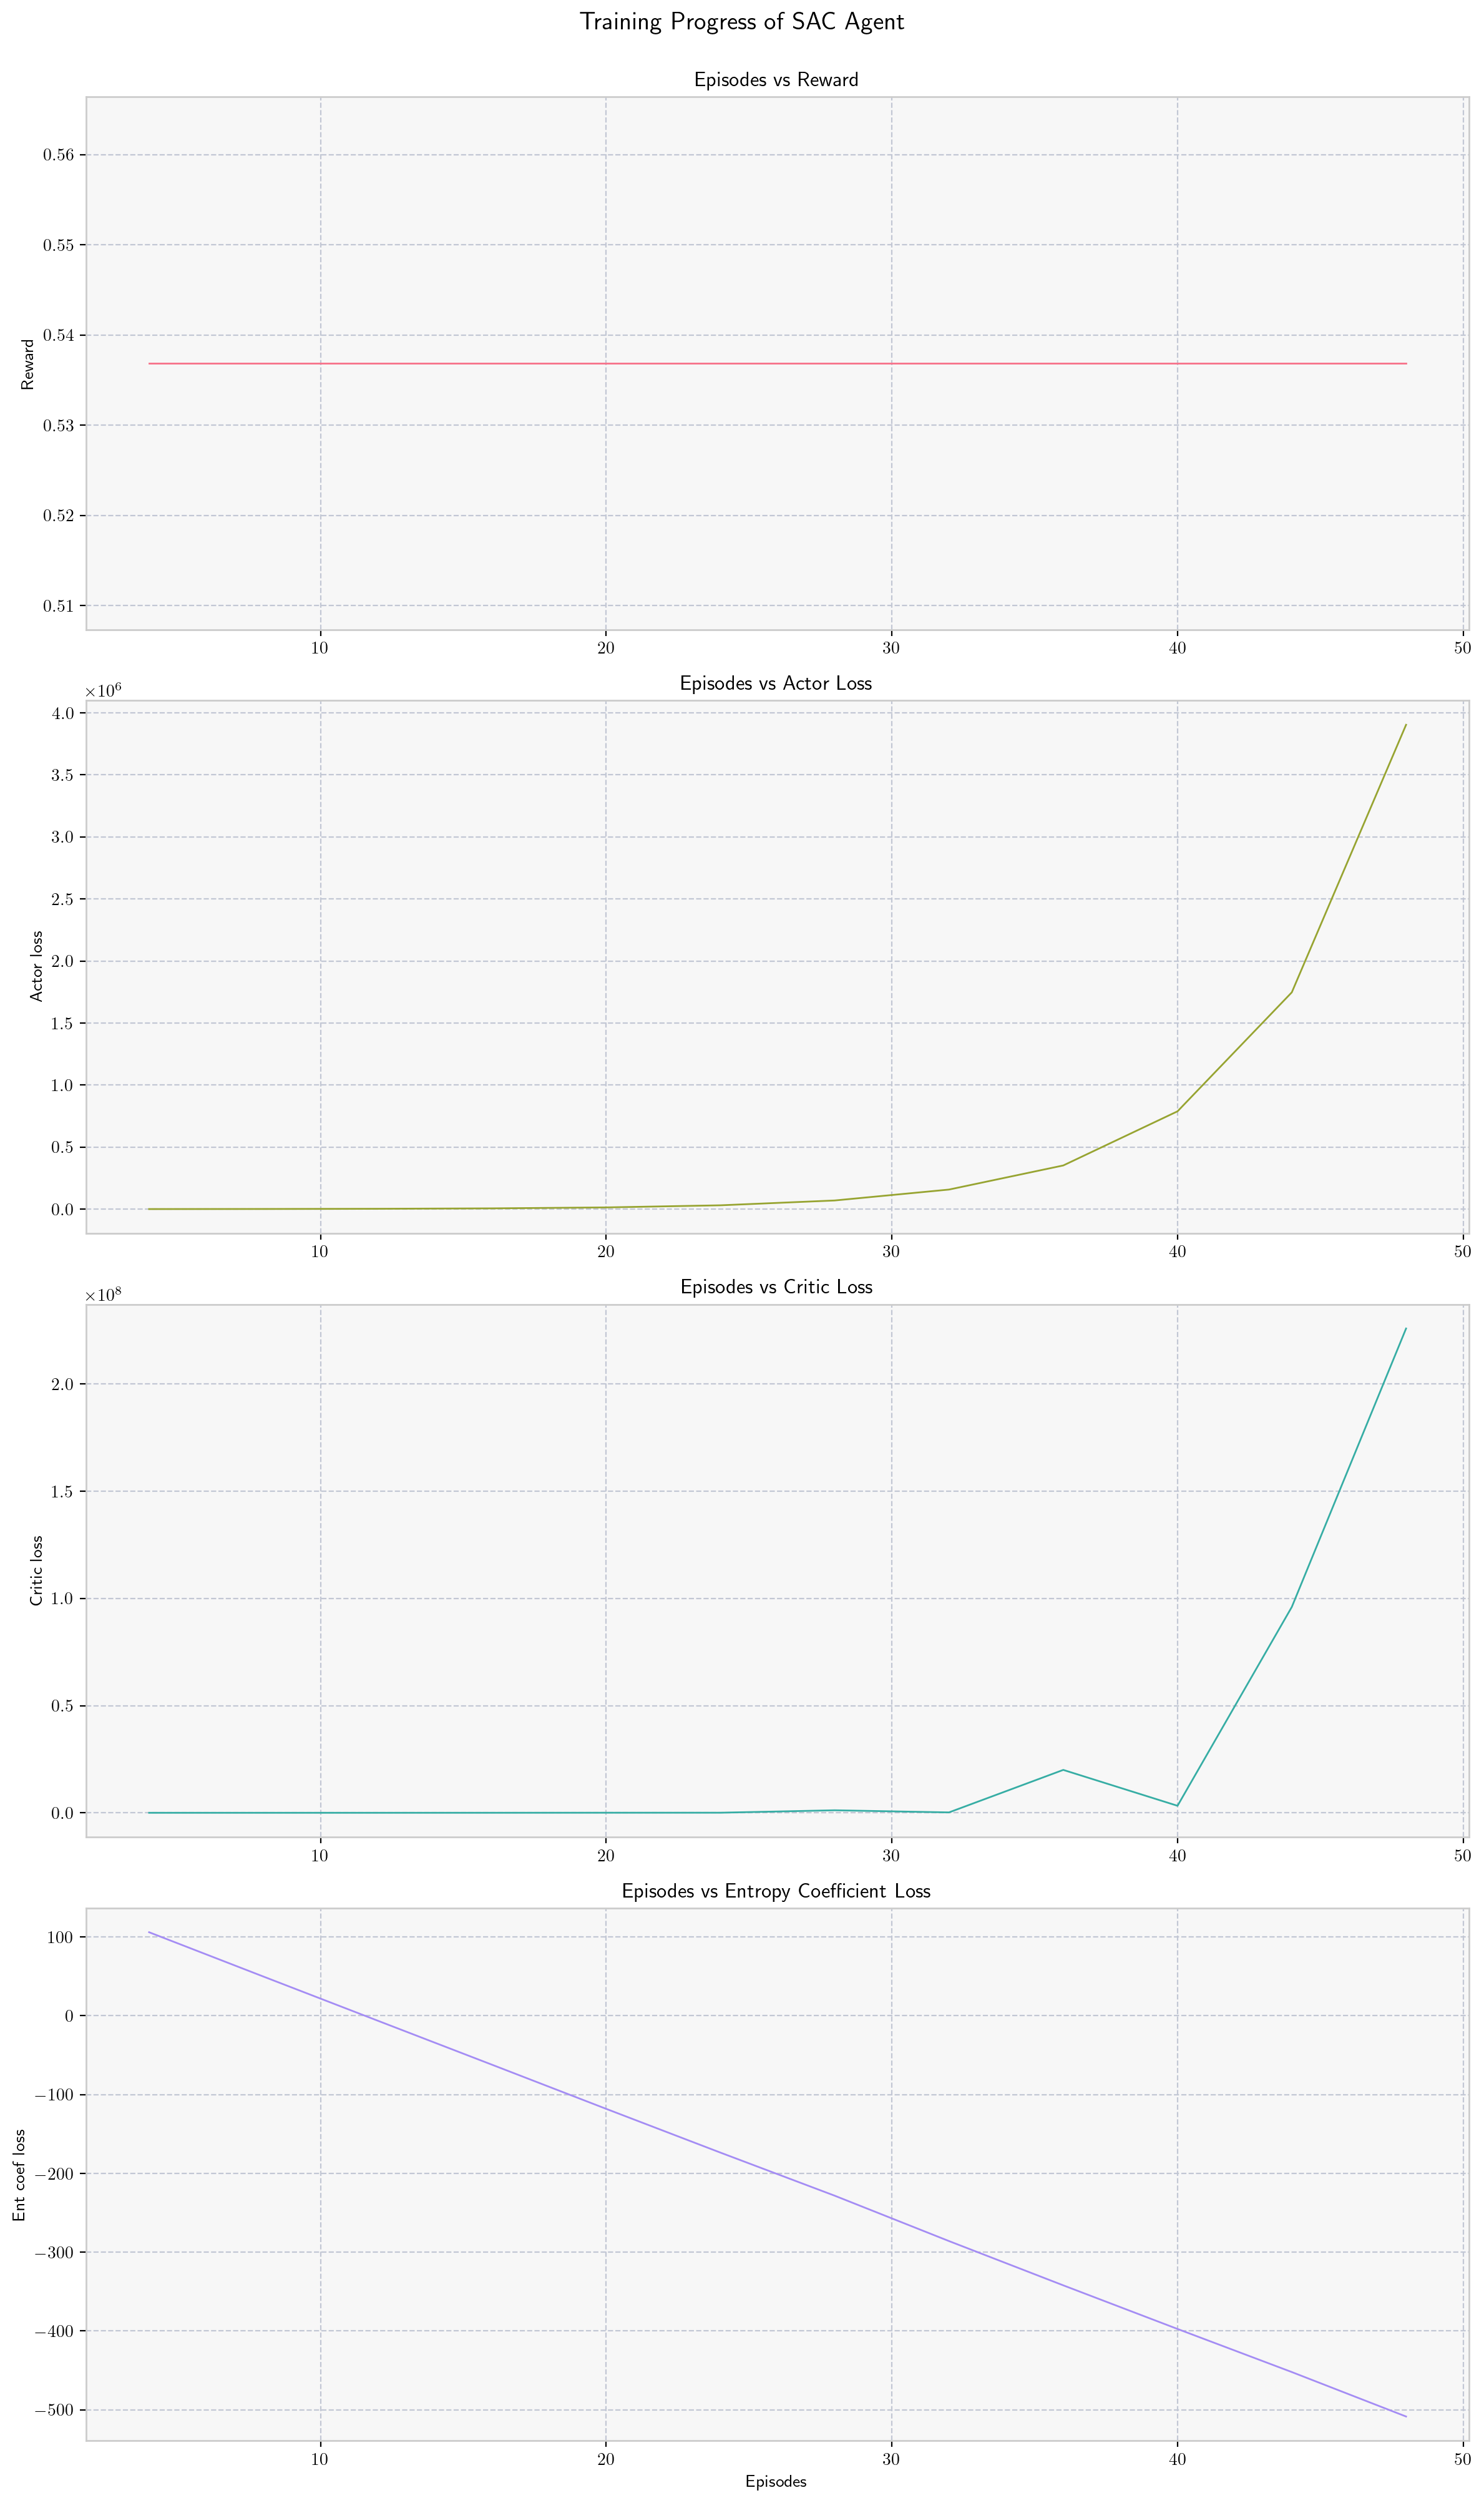

Evaluating model: SAC


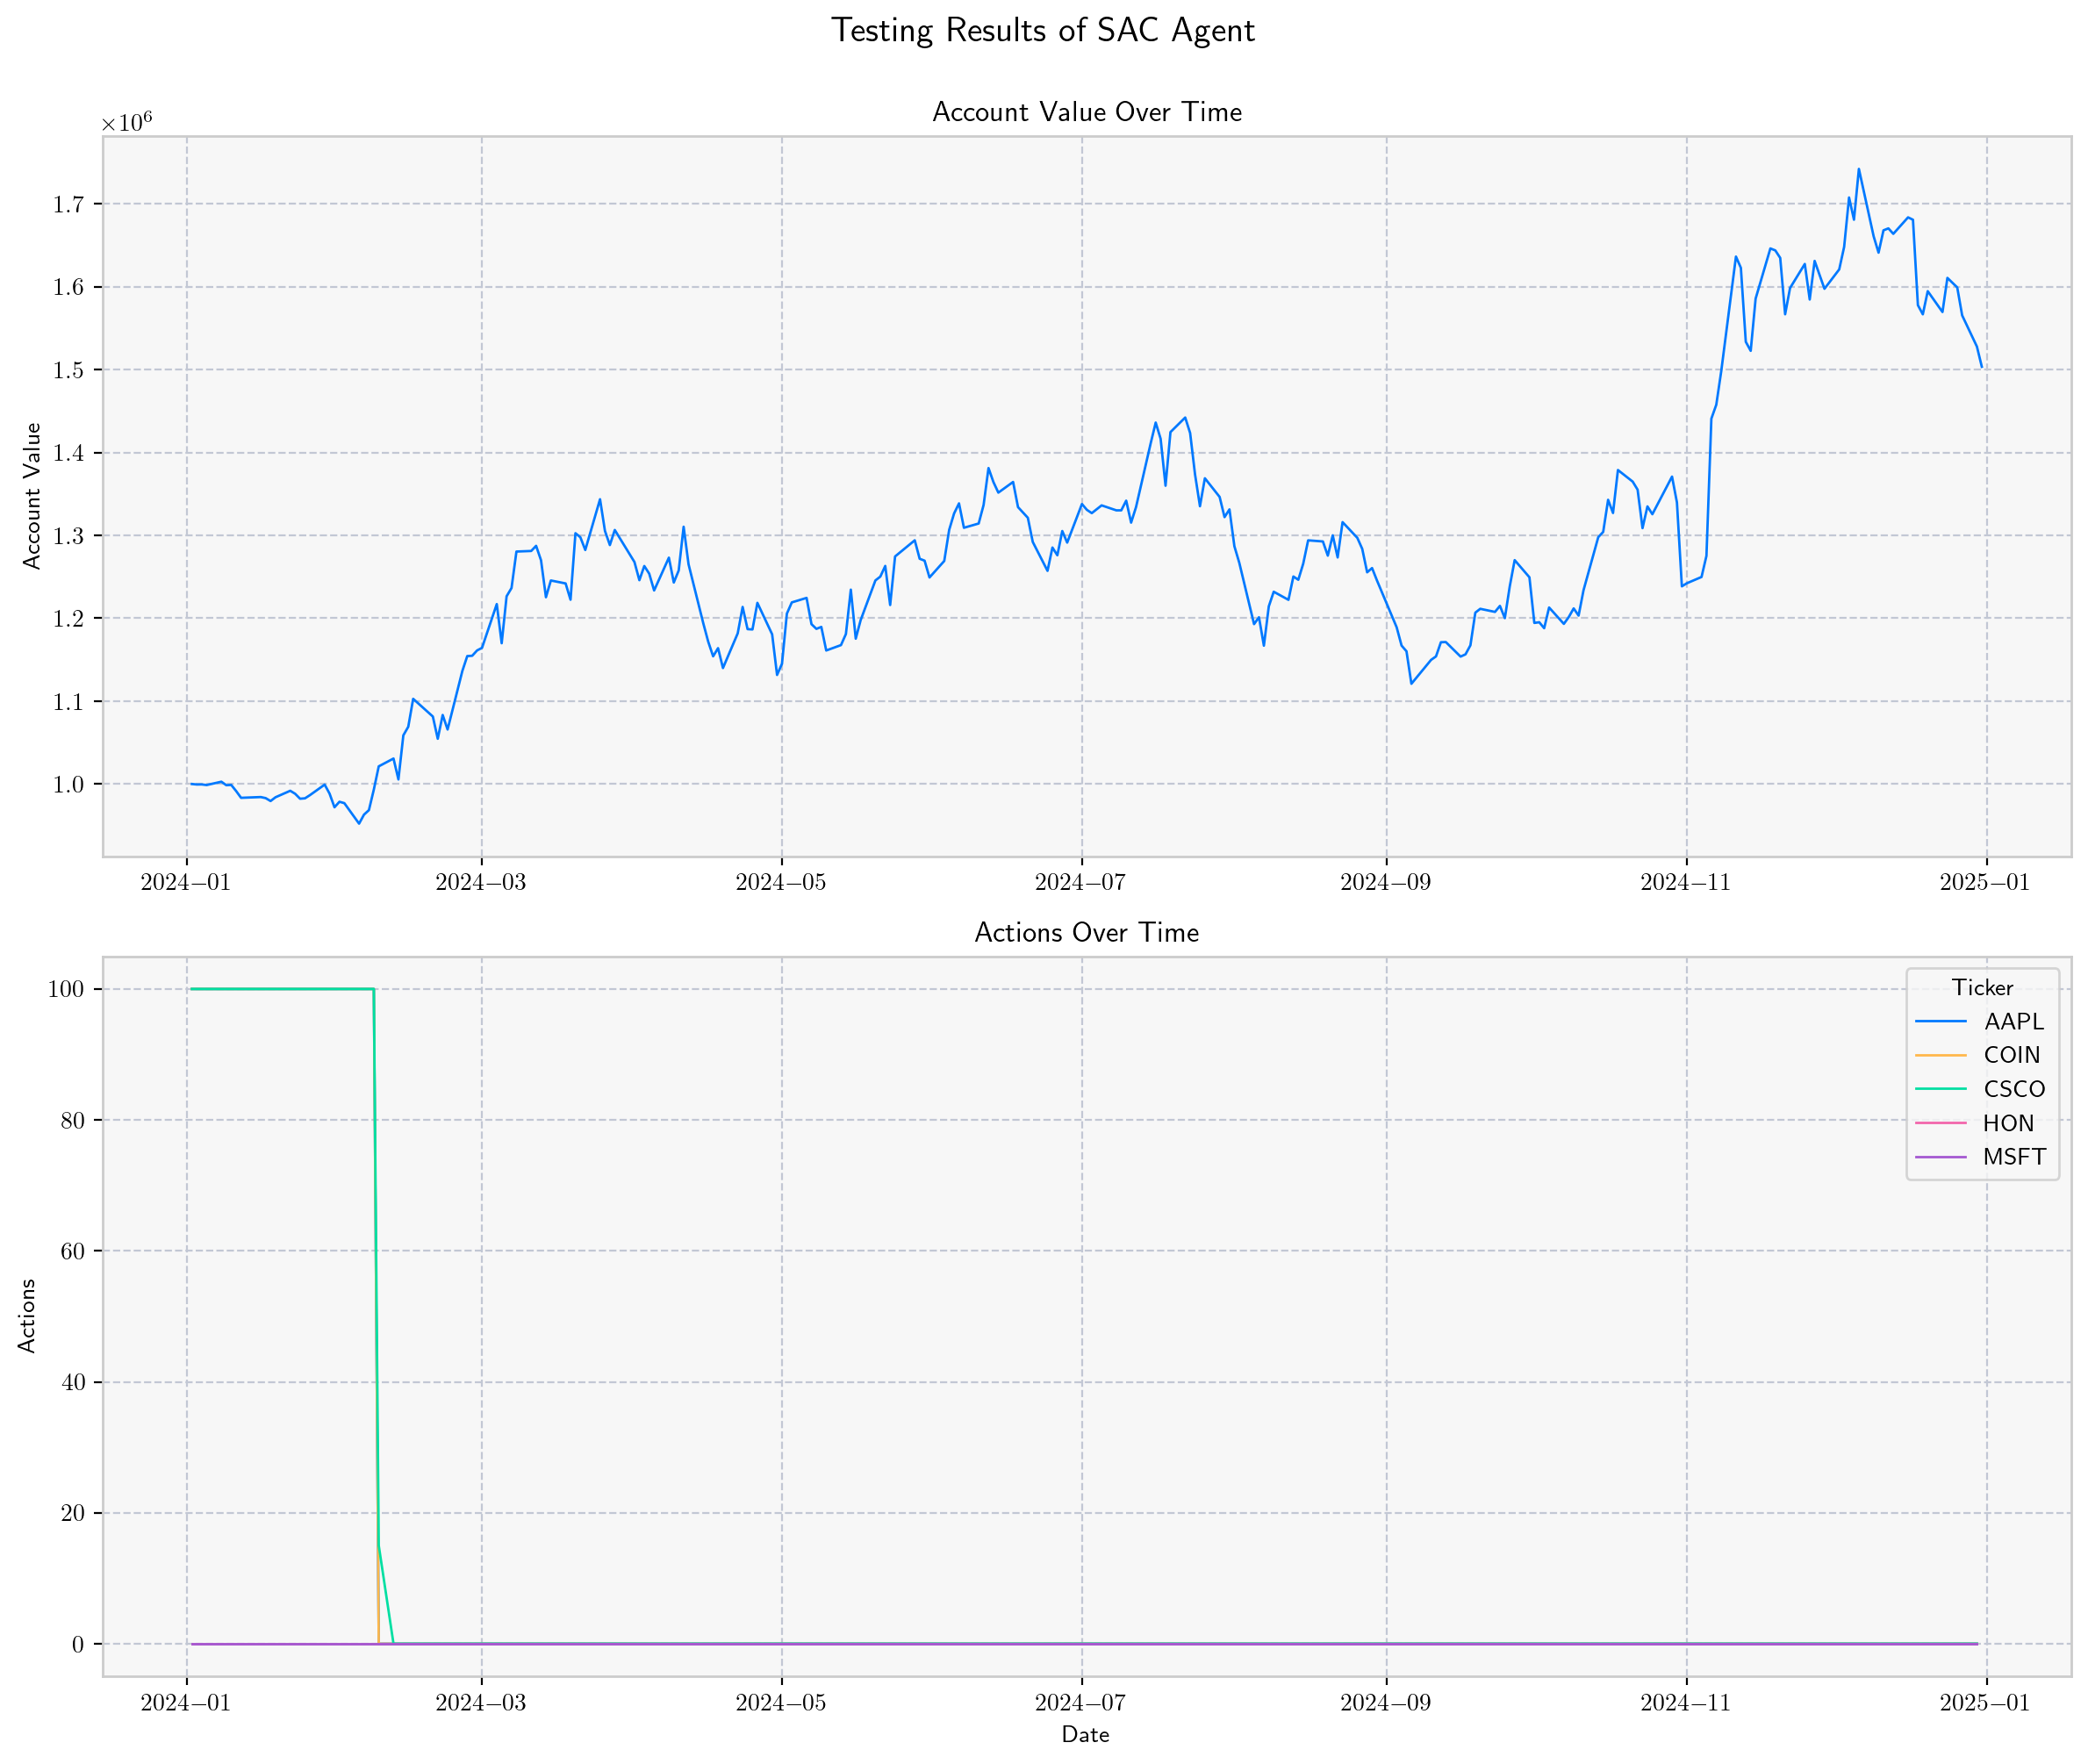

In [ ]:
for model in config.MODELS:
    agent = FinRLAgent(env_train)

    if TRAIN:
        print(f"Training model: {model.upper()}")
        trained_model = agent.train_model(
            model,
            logger_dir="../" + config.RESULTS_DIR,
            logger_outputs=["csv", "tensorboard"],
        )

        print(f"Saving model: {model.upper()}")
        agent.save_model(model, "../" + config.MODELS_DIR, config.TEST_NAME)

    else:
        print(f"Loading model: {model}")
        agent.load_model(model, "../" + config.MODELS_DIR, config.TEST_NAME)

    model_training_evaluation(model)

    print(f"Evaluating model: {model.upper()}")
    df_account, df_actions = agent.test_model(
        gym_env,
    )

    model_visualiser.evaluate_testing(
        model, df_account, df_actions, "../" + config.PLOT_DIR, config.TEST_NAME
    )